# 전처리

- 고객의 특성에 따라 그룹화 후, 그룹에 적합한 수익성 제고 모델 도출

## 환경 설정

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import chi2_contingency # 카이제곱검정(범주형변수 간 연관성)

import warnings

# 모든 경고 메시지를 무시
warnings.filterwarnings("ignore")

# 특정 경고 메시지를 무시
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import numpy as np
import pandas as pd

from scipy.stats import chi2_contingency # 카이제곱검정(범주형변수 간 연관성)

import warnings

# 모든 경고 메시지를 무시
warnings.filterwarnings("ignore")

# 특정 경고 메시지를 무시
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# df_original = pd.read_csv('/content/drive/MyDrive/bigdata/data_original.csv', encoding = 'utf8')
# df_original = df_original.reset_index()
# df_original.head()

In [5]:
# df_original = df_original.rename(mapper={'index':'key'}, axis=1)
# df_original

## 1 : 분석용 데이터 생성

### 1) 결측치 확인

- 성별, 연령, 멤버쉽 여부 등 고객의 개인 정보에 대해 결측치가 높게 분포
- 선예매 오픈일에 결측치가 높게 존재 > 선예매하지 않은 티켓이 존재

In [ ]:
df_original.isna().sum()

key                        0
age                  1300183
gender               1299714
membership_type_1    1299714
membership_type_2    1433215
membership_type_3    1749009
membership_type_4    1890675
membership_type_5    1919586
membership_type_6    1920868
tran_date                  0
tran_time                  0
play_date                  0
play_st_time               0
seat                       0
price                      0
ticket_cancel              0
discount_type              0
performance_code           0
pre_open_date         864385
open_date                340
genre                  25842
place                      0
running_time               0
intermission               0
member_yn                  0
dtype: int64

### 2) 결측치 데이터 확인

- 멤버쉽은 가입하지 않을 수 있기에, 멤버쉽을 제외한 결측치 행 선택
- 결측치가 많은 연령에 대해 확인 > 연령이 결측치인 행은 성별도 전체 결측치

In [ ]:
df_original[df_original['age'].isna()].isna().sum()

key                        0
age                  1300183
gender               1299714
membership_type_1    1299714
membership_type_2    1299762
membership_type_3    1300105
membership_type_4    1300178
membership_type_5    1300183
membership_type_6    1300183
tran_date                  0
tran_time                  0
play_date                  0
play_st_time               0
seat                       0
price                      0
ticket_cancel              0
discount_type              0
performance_code           0
pre_open_date         659734
open_date                284
genre                  14687
place                      0
running_time               0
intermission               0
member_yn                  0
dtype: int64

### 3) 데이터 범주 확인 확인

- 콘서트홀의 클래식 공연에 대한 수익성 제고가 필요
- 관련없는 데이터는 모두 삭제하여 정확한 클래식 공연의 특성 분석 필요

In [ ]:
print('장르 분포: ', set(df_original['genre']))
print('공연장 분포: ', set(df_original['place']))

장르 분포:  {'재즈', '콘서트', nan, '클래식', '크로스오버', '가족극', '기타', '전시', '복합장르', '무용', '실내악', '교향곡', '오페라', '성악', '합창', '독주'}
공연장 분포:  {'콘서트홀', '리사이틀홀', 'IBK챔버홀'}


### 4) 분석용 데이터 추출

- 1) 장르와 공연장 추출
- 2) 고객의 특성이 없는 데이터는 제외 (고객 특성에 따른 그룹화를 위해 삭제)
- 3) 멤버쉽은 고객의 특성으로 간주하지 않음

In [ ]:
df_new = df_original[(df_original['genre'] == '클래식') & (df_original['place'] == '콘서트홀')]
df_new.head() # 콘서트홀의 장르가 클래식인 데이터만 추출 = df_new로 저장

key   age gender membership_type_1 membership_type_2 membership_type_3  \
9     9   NaN      F                블루                무료               NaN   
18   18  70.0      M                골드                무료               NaN   
19   19   NaN    NaN               NaN               NaN               NaN   
27   27   NaN    NaN               NaN               NaN               NaN   
28   28  20.0      F                무료              싹틔우미               NaN   

   membership_type_4 membership_type_5  membership_type_6  tran_date  ...  \
9                NaN               NaN                NaN   20190703  ...   
18               NaN               NaN                NaN   20191220  ...   
19               NaN               NaN                NaN   20190919  ...   
27               NaN               NaN                NaN   20190704  ...   
28               NaN               NaN                NaN   20230327  ...   

    ticket_cancel  discount_type  performance_code pre_open_date   open_date  \
9               0             일반              1528           NaN  20190413.0   
18              0     골드회원 할인30%                76    20191220.0  20191223.0   
19              0          기획사판매              1005           NaN  20190826.0   
27              0            초대권              2215    20190710.0  20190710.0   
28              0     싹틔우미 할인40%               221    20230225.0  20230226.0   

    genre place  running_time  intermission  member_yn  
9     클래식  콘서트홀           100            15          N  
18    클래식  콘서트홀           120            15          Y  
19    클래식  콘서트홀           100            15          N  
27    클래식  콘서트홀           110            15          N  
28    클래식  콘서트홀           150            15          Y  

[5 rows x 25 columns]

In [ ]:
df_new.isna().sum() # 회원정보에 대한 결측치가 높게 분포

key                       0
age                  129461
gender               129381
membership_type_1    129381
membership_type_2    151544
membership_type_3    206885
membership_type_4    231591
membership_type_5    236694
membership_type_6    236966
tran_date                 0
tran_time                 0
play_date                 0
play_st_time              0
seat                      0
price                     0
ticket_cancel             0
discount_type             0
performance_code          0
pre_open_date         95825
open_date                 0
genre                     0
place                     0
running_time              0
intermission              0
member_yn                 0
dtype: int64

In [ ]:
len(df_new)

236966

- 연령이 결측치인 행을 제외한 경우, 데이터 분포 확인
- 연령 결측치 행을 제외하면 장르와 멤버쉽 1에 대한 결측치가 모두 제거
- 즉, 회원 정보가 있으면 최소 1개의 멤버쉽은 가입하고 있다.

전체 데이터 개수 : 107,505개

멤버쉽 3~5는 결측치가 절반 이상이라 컬럼 삭제

In [ ]:
df_new.dropna(subset=['age']).isna().sum() # 연령이 결측인 행을 제거하면 멤버쉽1까지 결측치가 모두 삭제됨
# 전체 데이터 107,505개 중 멤버쉽 3~6은 결측치가 70% ~ 100% > 컬럼 자체 삭제 필요

key                       0
age                       0
gender                    0
membership_type_1         0
membership_type_2     22152
membership_type_3     77444
membership_type_4    102130
membership_type_5    107233
membership_type_6    107505
tran_date                 0
tran_time                 0
play_date                 0
play_st_time              0
seat                      0
price                     0
ticket_cancel             0
discount_type             0
performance_code          0
pre_open_date         37863
open_date                 0
genre                     0
place                     0
running_time              0
intermission              0
member_yn                 0
dtype: int64

In [ ]:
df_new = df_new.dropna(subset=['age']) # 고객정보 중 연령의 결측행이 가장 많이 분포 > 연령 기준으로 결측행 제거

In [ ]:
df_new = df_new.drop(columns=['membership_type_3','membership_type_4','membership_type_5', 'membership_type_6'])
# 멤버쉽타입 3~6까지는 결측치가 50%이상 분포 > 삭제

In [ ]:
df_new.head() # 멤버쉽 타입1은 결측치 X / 타입2는 일부 존재하나 멤버쉽 중복 가입이기에 컬럼 유지

key   age gender membership_type_1 membership_type_2  tran_date  \
18   18  70.0      M                골드                무료   20191220   
28   28  20.0      F                무료              싹틔우미   20230327   
29   29  50.0      F                블루                무료   20230317   
38   38  40.0      M                골드                무료   20210711   
53   53  30.0      F                블루                무료   20190714   

    tran_time  play_date  play_st_time         seat  ...  ticket_cancel  \
18       1106   20200211          1930    2층 BOX2 2  ...              0   
28       1601   20230523          1930  1층 B블록21열 9  ...              0   
29       1348   20230523          1930  1층 B블록17열 4  ...              0   
38       2344   20210919          1700  1층 C블록15열 8  ...              2   
53       2038   20191120          2000   3층 G블록1열 5  ...              0   

                  discount_type performance_code  pre_open_date   open_date  \
18                   골드회원 할인30%               76     20191220.0  20191223.0   
28                   싹틔우미 할인40%              221     20230225.0  20230226.0   
29  라흐마니노프탄생150주년(8매/3.27까지)20%              221     20230225.0  20230226.0   
38                   골드회원 할인10%             2538     20210702.0  20210703.0   
53                    그린회원 할인5%             2059            NaN  20190629.0   

    genre place running_time  intermission  member_yn  
18    클래식  콘서트홀          120            15          Y  
28    클래식  콘서트홀          150            15          Y  
29    클래식  콘서트홀          150            15          Y  
38    클래식  콘서트홀          110            20          Y  
53    클래식  콘서트홀          100            15          Y  

[5 rows x 21 columns]

In [ ]:
len(df_new) # 총 데이터 행 개수 = 107,505개

107505

## 2 : 파생변수 생성

고객의 특성에 따라 그룹을 생성하고, 해당 그룹이 갖는 의미를 파악하고자 함

따라서, 고객의 특성에 해당하는 데이터세트를 생성 후 클러스터링을 진행해야 함

현재, 고객의 특성을 나타내는 컬럼은 연령, 성별, 멤버쉽여부, 멤버쉽종류 1~6

멤버쉽 종류는 여러개 가진 경우가 존재하기에, 이를 기반으로 파생변수를 생성해 데이터셋 정비 필요

### 1) 멤버쉽 종류

- 멤버쉽은 여러개 가입하지 않기에 결측치가 있다고 모두 제거 불가

골드 10, 블루 4, 그린 2만원의 연회비 지불(유료, 법인은 없음)

무료 멤버쉽은 연령별로 구분됨 : 싹틔우미(7-24) < 일반 < 노블(69~)

In [ ]:
# 멤버쉽 종류 분포 확인

print('멤버쉽1 :' , set(df_new['membership_type_1']))
print('멤버쉽2 :' , set(df_new['membership_type_2']))

멤버쉽1 : {'블루', '무료', '골드'}
멤버쉽2 : {nan, '노블', '싹틔우미', '무료', '그린', '골드'}


In [ ]:
set(df_new[df_new['membership_type_2'].isna()]['membership_type_1'])

# 추가 멤버쉽이 없는 사람들은 무료만 보유

{'무료'}

In [ ]:
df_new.groupby(['membership_type_1','membership_type_2']).count()[['member_yn']]

member_yn
membership_type_1 membership_type_2           
골드                무료                     26947
무료                그린                     14977
                  노블                      1342
                  싹틔우미                   14377
블루                골드                     13230
                  무료                     14480

- 유료 멤버쉽을 보유한 회원은 유료 멤버쉽 종류로 선정
- 무료 멤버쉽인 회원은 싹틔우미와 노블로 나눠서 분류
- 유료 멤버쉽을 2개 보유한 회원은 연회비가 높은 멤버쉽을 우선으로 선정
- 골드회원을 위한 주차 등 우선 혜택이 예술의 전당에 존재

In [ ]:
df_new['membership'] = df_new['membership_type_2']

In [ ]:
df_new.loc[(df_new['membership_type_1'] == '골드') & (df_new['membership_type_2'] == '무료'), 'membership'] = '골드'
df_new.loc[(df_new['membership_type_1'] == '블루') & (df_new['membership_type_2'] == '무료'), 'membership'] = '블루'

In [ ]:
df_new.groupby(['membership']).count()[['member_yn']]

member_yn
membership           
골드              40177
그린              14977
노블               1342
블루              14480
싹틔우미            14377

- 멤버쉽 통일에 따른 원 컬럼 제외

In [ ]:
df2 = df_new.drop(columns=['membership_type_1','membership_type_2'])
df2.isna().sum()

key                     0
age                     0
gender                  0
tran_date               0
tran_time               0
play_date               0
play_st_time            0
seat                    0
price                   0
ticket_cancel           0
discount_type           0
performance_code        0
pre_open_date       37863
open_date               0
genre                   0
place                   0
running_time            0
intermission            0
member_yn               0
membership          22152
dtype: int64

In [ ]:
# 추가 멤버쉽이 없던 사람들은 무료멤버쉽

df2['membership'].fillna('무료', inplace=True)

In [ ]:
df2.isna().sum()

key                     0
age                     0
gender                  0
tran_date               0
tran_time               0
play_date               0
play_st_time            0
seat                    0
price                   0
ticket_cancel           0
discount_type           0
performance_code        0
pre_open_date       37863
open_date               0
genre                   0
place                   0
running_time            0
intermission            0
member_yn               0
membership              0
dtype: int64

In [ ]:
set(df2['membership'])

{'골드', '그린', '노블', '무료', '블루', '싹틔우미'}

In [ ]:
df2.groupby(['membership']).count()[['member_yn']]

member_yn
membership           
골드              40177
그린              14977
노블               1342
무료              22152
블루              14480
싹틔우미            14377

### 2) 연회비

- 연회비는 멤버쉽의 종류마다 상이하며, 연회비에 따른 제공 혜택이 모두 상이
- 따라서, 연회비의 범위가 고객의 구매에 영향을 미치는지 확인하고자 연회비 컬럼 생성

In [ ]:
df2['member_fee'] = df2['membership'].map({'골드': 100000, '블루': 40000, '그린': 20000, '무료' : 0, '일반':0, '노블':0, '싹틔우미':0})

In [ ]:
df2.groupby(['member_fee']).count()[['member_yn']]

member_yn
member_fee           
0               37871
20000           14977
40000           14480
100000          40177

In [ ]:
df = df2.reset_index().drop('index', axis=1)
df.head()

key   age gender  tran_date  tran_time  play_date  play_st_time  \
0   18  70.0      M   20191220       1106   20200211          1930   
1   28  20.0      F   20230327       1601   20230523          1930   
2   29  50.0      F   20230317       1348   20230523          1930   
3   38  40.0      M   20210711       2344   20210919          1700   
4   53  30.0      F   20190714       2038   20191120          2000   

          seat  price  ticket_cancel  ... performance_code  pre_open_date  \
0    2층 BOX2 2  42000              0  ...               76     20191220.0   
1  1층 B블록21열 9  66000              0  ...              221     20230225.0   
2  1층 B블록17열 4  88000              0  ...              221     20230225.0   
3  1층 C블록15열 8  99000              2  ...             2538     20210702.0   
4   3층 G블록1열 5  38000              0  ...             2059            NaN   

    open_date  genre place running_time  intermission  member_yn membership  \
0  20191223.0    클래식  콘서트홀          120            15          Y         골드   
1  20230226.0    클래식  콘서트홀          150            15          Y       싹틔우미   
2  20230226.0    클래식  콘서트홀          150            15          Y         블루   
3  20210703.0    클래식  콘서트홀          110            20          Y         골드   
4  20190629.0    클래식  콘서트홀          100            15          Y         블루   

  member_fee  
0     100000  
1          0  
2      40000  
3     100000  
4      40000  

[5 rows x 21 columns]

## 3: 고객 특성 데이터 추출

In [ ]:
df.columns

Index(['key', 'age', 'gender', 'tran_date', 'tran_time', 'play_date',
       'play_st_time', 'seat', 'price', 'ticket_cancel', 'discount_type',
       'performance_code', 'pre_open_date', 'open_date', 'genre', 'place',
       'running_time', 'intermission', 'member_yn', 'membership',
       'member_fee'],
      dtype='object')

In [ ]:
customer = df[['key', 'age', 'gender','membership','member_yn','member_fee','discount_type']]

In [ ]:
customer.head()

key   age gender membership member_yn  member_fee  \
0   18  70.0      M         골드         Y      100000   
1   28  20.0      F       싹틔우미         Y           0   
2   29  50.0      F         블루         Y       40000   
3   38  40.0      M         골드         Y      100000   
4   53  30.0      F         블루         Y       40000   

                 discount_type  
0                   골드회원 할인30%  
1                   싹틔우미 할인40%  
2  라흐마니노프탄생150주년(8매/3.27까지)20%  
3                   골드회원 할인10%  
4                    그린회원 할인5%

In [ ]:
customer

key   age gender membership member_yn  member_fee  \
0            18  70.0      M         골드         Y      100000   
1            28  20.0      F       싹틔우미         Y           0   
2            29  50.0      F         블루         Y       40000   
3            38  40.0      M         골드         Y      100000   
4            53  30.0      F         블루         Y       40000   
...         ...   ...    ...        ...       ...         ...   
107500  1920701  40.0      F         골드         Y      100000   
107501  1920705  40.0      F         골드         Y      100000   
107502  1920743  40.0      F         무료         Y           0   
107503  1920753  40.0      F         무료         Y           0   
107504  1920811  70.0      M         골드         Y      100000   

                      discount_type  
0                        골드회원 할인30%  
1                        싹틔우미 할인40%  
2       라흐마니노프탄생150주년(8매/3.27까지)20%  
3                        골드회원 할인10%  
4                         그린회원 할인5%  
...                             ...  
107500      얼리버드할인(1인4매/~2월16일까지)5%  
107501                   골드회원 할인10%  
107502                    조기예매 할인5%  
107503                           일반  
107504                   골드회원 할인20%  

[107505 rows x 7 columns]

## 4: 할인 타입에 대한 추가 분석 - 토픽모델링

다양한 할인 이벤트에 고객이 참여하여 티켓을 구매 - 할인 이력에 대한 분류

In [ ]:
customer

key   age gender membership member_yn  member_fee  \
0            18  70.0      M         골드         Y      100000   
1            28  20.0      F       싹틔우미         Y           0   
2            29  50.0      F         블루         Y       40000   
3            38  40.0      M         골드         Y      100000   
4            53  30.0      F         블루         Y       40000   
...         ...   ...    ...        ...       ...         ...   
107500  1920701  40.0      F         골드         Y      100000   
107501  1920705  40.0      F         골드         Y      100000   
107502  1920743  40.0      F         무료         Y           0   
107503  1920753  40.0      F         무료         Y           0   
107504  1920811  70.0      M         골드         Y      100000   

                      discount_type  
0                        골드회원 할인30%  
1                        싹틔우미 할인40%  
2       라흐마니노프탄생150주년(8매/3.27까지)20%  
3                        골드회원 할인10%  
4                         그린회원 할인5%  
...                             ...  
107500      얼리버드할인(1인4매/~2월16일까지)5%  
107501                   골드회원 할인10%  
107502                    조기예매 할인5%  
107503                           일반  
107504                   골드회원 할인20%  

[107505 rows x 7 columns]

### 1) 라이브러리 호출

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 2) 데이터 전처리

In [ ]:
customer['discount_type'] = customer['discount_type'].str.lower() # 소문자 변환

In [ ]:
set(customer['discount_type']) # 데이터 종류 조회

{'06~19년 ssf 유료티켓 소지자20%',
 '22년 라이브러리컴퍼니 재관람(1매1인)10%',
 '22년 하반기 패키지 추가구매(1인2매)20%',
 '65세이상 할인(본인만)20%',
 '70세 이상(본인만)40%',
 'dramatic 특별할인(1인8매)30%',
 'good_bye 2022 특별할인(1인8매)20%',
 'k-lang 멤버십 할인(1인2매)20%',
 'k-lang 할인(1인2매)20%',
 'kbs교향악단 후원회원 할인(1인2매)20%',
 'kbs교향악단 후원회원(1인2매)20%',
 'kosymi 유료회원(1인4매)40%',
 '가을맞이 특별할인(1인8매)30%',
 '가을맞이 특별할인(1인8매/~10.31까지)30%',
 '가정의 달 특별할인(8매/4.19까지)20%',
 '가정의 달 특별할인(8매/4.28까지)20%',
 '골드회원 특가50%',
 '골드회원 할인10%',
 '골드회원 할인12%',
 '골드회원 할인15%',
 '골드회원 할인20%',
 '골드회원 할인25%',
 '골드회원 할인30%',
 '골드회원 할인40%',
 '골드회원 할인5%',
 '골드회원(법인a) 할인10%',
 '골드회원(법인a) 할인20%',
 '골드회원(법인a) 할인30%',
 '공연예매권',
 '국가유공자 할인(동반1인)50%',
 '국가유공자,의사자 유족(본인만)50%',
 '국가유공자,의상자(1~2급/동반1인)50%',
 '국가유공자,의상자1~2급(동반1인)50%',
 '국가유공자/의사자 유족증(본인만)50%',
 '그린회원 할인10%',
 '그린회원 할인15%',
 '그린회원 할인20%',
 '그린회원 할인25%',
 '그린회원 할인30%',
 '그린회원 할인5%',
 '기부 봉사 릴레이 할인20%',
 '노블회원 할인40%',
 '노블회원 할인50%',
 '농협카드 할인(1인8매)30%',
 '다둥이카드 소지자(본인만)20%',
 '다이내믹 할인(1인8매)30%',
 '단체20인이상10%',
 '단체20인이상25%',
 '당일할인

In [ ]:
# 할인명을 작성한 내용이기에 텍스트 중 할인, 특가 등 의미없는 단어 삭제

customer['discount_type'] = customer['discount_type'].str.replace('할인', ' ')
customer['discount_type'] = customer['discount_type'].str.replace('특가', ' ')

In [ ]:
stop_words = ['~', '/', '(', ')']  # 조사 등은 크게 존재 X

customer['discount'] = customer['discount_type'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

In [ ]:
set(customer['discount'])

{'06~19년 ssf 유료티켓 소지자20 %',
 '22년 라이브러리컴퍼니 재관람 1매1인 10 %',
 '22년 하반기 패키지 추가구매 1인2매 20 %',
 '65세이상 본인만 20 %',
 '70세 이상 본인만 40 %',
 'dramatic 특별 1인8매 30 %',
 'good_bye 2022 특별 1인8매 20 %',
 'k-lang 1인2매 20 %',
 'k-lang 멤버십 1인2매 20 %',
 'kbs교향악단 후원회원 1인2매 20 %',
 'kosymi 유료회원 1인4매 40 %',
 '가을맞이 특별 1인8매 30 %',
 '가을맞이 특별 1인8매/~10.31까지 30 %',
 '가정의 달 특별 8매/4.19까지 20 %',
 '가정의 달 특별 8매/4.28까지 20 %',
 '골드회원 10 %',
 '골드회원 12 %',
 '골드회원 15 %',
 '골드회원 20 %',
 '골드회원 25 %',
 '골드회원 30 %',
 '골드회원 40 %',
 '골드회원 5 %',
 '골드회원 50 %',
 '골드회원 법인a 10 %',
 '골드회원 법인a 20 %',
 '골드회원 법인a 30 %',
 '공연예매권',
 '국가유공자 , 의사자 유족 본인만 50 %',
 '국가유공자 , 의상자 1~2급/동반1인 50 %',
 '국가유공자 , 의상자1~2급 동반1인 50 %',
 '국가유공자 동반1인 50 %',
 '국가유공자/의사자 유족증 본인만 50 %',
 '그린회원 10 %',
 '그린회원 15 %',
 '그린회원 20 %',
 '그린회원 25 %',
 '그린회원 30 %',
 '그린회원 5 %',
 '기부 봉사 릴레이 20 %',
 '노블회원 40 %',
 '노블회원 50 %',
 '농협카드 1인8매 30 %',
 '다둥이카드 소지자 본인만 20 %',
 '다이내믹 1인8매 30 %',
 '단체20인이상10 %',
 '단체20인이상25 %',
 '당일 티켓',
 '당일 티켓_',
 '대학생 10 %',
 '대학생 본인만 20 %',
 '라흐마니노

### 3) 토큰 추출

In [ ]:
# 할인율 먼저 추출

import re

def extract_and_remove_percentages(text):
    pattern = r'(\d+)\s*%'  # 할인율 추출
    matches = re.finditer(pattern, text)

    percentages = []
    for match in matches:
        percentage = match.group(0)
        cleaned_percentage = percentage.replace(' ', '')  # 빈 칸을 없애는 부분
        percentages.append(cleaned_percentage)

    # 숫자% 값을 텍스트에서 제거
    cleaned_text = re.sub(pattern, '', text)

    return percentages, cleaned_text

In [ ]:
# discount 컬럼에서 %와 %를 제외한 문자를 추출
result = customer['discount'].apply(extract_and_remove_percentages)

In [ ]:
# 분리된 결과를 새로운 컬럼으로 생성
customer['discount_%'] = result.apply(lambda x: x[0])
customer['discount_text'] = result.apply(lambda x: x[1])

In [ ]:
customer['discount_%'] = customer['discount_%'].apply(lambda x: x[0] if x else None)

In [ ]:
customer.head()

key   age gender membership member_yn  member_fee  \
0   18  70.0      M         골드         Y      100000   
1   28  20.0      F       싹틔우미         Y           0   
2   29  50.0      F         블루         Y       40000   
3   38  40.0      M         골드         Y      100000   
4   53  30.0      F         블루         Y       40000   

                 discount_type                      discount discount_%  \
0                    골드회원  30%                     골드회원 30 %        30%   
1                    싹틔우미  40%                     싹틔우미 40 %        40%   
2  라흐마니노프탄생150주년(8매/3.27까지)20%  라흐마니노프탄생150주년 8매/3.27까지 20 %        20%   
3                    골드회원  10%                     골드회원 10 %        10%   
4                     그린회원  5%                      그린회원 5 %         5%   

              discount_text  
0                     골드회원   
1                     싹틔우미   
2  라흐마니노프탄생150주년 8매/3.27까지   
3                     골드회원   
4                     그린회원

### 3) 단어 추출

In [ ]:
!pip install konlpy
from konlpy.tag import Okt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 47.7 MB/s eta 0:00:00


In [ ]:
okt = Okt()

In [ ]:
# 각 행을 토큰하기 위한 함수 선언 (단어 단위로 토큰)
def tokenize_text(text):
    tokens = okt.morphs(text)
    return tokens

In [ ]:
# 할인명 토큰 > 새로운 변수로 생성
customer['discount_token'] = customer['discount_text'].apply(tokenize_text)

In [ ]:
customer['discount_token']

0                                         [골드, 회원]
1                                       [싹, 틔우, 미]
2         [라흐마니노프, 탄생, 150, 주년, 8, 매, /, 3.27, 까지]
3                                         [골드, 회원]
4                                         [그린, 회원]
                            ...                   
107500       [얼리, 버드, 1, 인, 4, 매, /~, 2월, 16일, 까지]
107501                                    [골드, 회원]
107502                                    [조기, 예매]
107503                                        [일반]
107504                                    [골드, 회원]
Name: discount_token, Length: 107505, dtype: object

In [ ]:
# 토큰 결과에서 공백 삭제

def remove_spaces(lst):
    return [str(item).replace(" ", "") for item in lst]

# 함수 적용
customer['discount_token']= customer['discount_token'].apply(remove_spaces)

In [ ]:
customer['discount_token']

0                                         [골드, 회원]
1                                       [싹, 틔우, 미]
2         [라흐마니노프, 탄생, 150, 주년, 8, 매, /, 3.27, 까지]
3                                         [골드, 회원]
4                                         [그린, 회원]
                            ...                   
107500       [얼리, 버드, 1, 인, 4, 매, /~, 2월, 16일, 까지]
107501                                    [골드, 회원]
107502                                    [조기, 예매]
107503                                        [일반]
107504                                    [골드, 회원]
Name: discount_token, Length: 107505, dtype: object

### 4) 토큰 결과 재정비

- 불용어 제거 : 의미를 알 수 없는 숫자, 인, 매, 기호, 까지, 회원 등 단어 삭제
- 1인N매 등 데이터는 다중 할인이 가능함을 의미 (별도 컬럼으로 생성)

In [ ]:
stop_words = ['인','매','까지','회원','!',',','-','/','/~','06~19년',1,10,150,2,19,20,2022,23,24,29,3,4,6,65,7,70,8,'_','~']

# 토큰 리스트에 대해 불용어 제거 함수
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# 'text_tokens' 컬럼의 각 리스트에 대해 불용어 제거
customer['discount_token_2'] = customer['discount_token'].apply(remove_stopwords)

In [ ]:
customer

key   age gender membership member_yn  member_fee  \
0            18  70.0      M         골드         Y      100000   
1            28  20.0      F       싹틔우미         Y           0   
2            29  50.0      F         블루         Y       40000   
3            38  40.0      M         골드         Y      100000   
4            53  30.0      F         블루         Y       40000   
...         ...   ...    ...        ...       ...         ...   
107500  1920701  40.0      F         골드         Y      100000   
107501  1920705  40.0      F         골드         Y      100000   
107502  1920743  40.0      F         무료         Y           0   
107503  1920753  40.0      F         무료         Y           0   
107504  1920811  70.0      M         골드         Y      100000   

                      discount_type                      discount discount_%  \
0                         골드회원  30%                     골드회원 30 %        30%   
1                         싹틔우미  40%                     싹틔우미 40 %        40%   
2       라흐마니노프탄생150주년(8매/3.27까지)20%  라흐마니노프탄생150주년 8매/3.27까지 20 %        20%   
3                         골드회원  10%                     골드회원 10 %        10%   
4                          그린회원  5%                      그린회원 5 %         5%   
...                             ...                           ...        ...   
107500       얼리버드 (1인4매/~2월16일까지)5%        얼리버드 1인4매/~2월16일까지 5 %         5%   
107501                    골드회원  10%                     골드회원 10 %        10%   
107502                     조기예매  5%                      조기예매 5 %         5%   
107503                           일반                            일반       None   
107504                    골드회원  20%                     골드회원 20 %        20%   

                   discount_text                            discount_token  \
0                          골드회원                                   [골드, 회원]   
1                          싹틔우미                                 [싹, 틔우, 미]   
2       라흐마니노프탄생150주년 8매/3.27까지   [라흐마니노프, 탄생, 150, 주년, 8, 매, /, 3.27, 까지]   
3                          골드회원                                   [골드, 회원]   
4                          그린회원                                   [그린, 회원]   
...                          ...                                       ...   
107500       얼리버드 1인4매/~2월16일까지      [얼리, 버드, 1, 인, 4, 매, /~, 2월, 16일, 까지]   
107501                     골드회원                                   [골드, 회원]   
107502                     조기예매                                   [조기, 예매]   
107503                        일반                                      [일반]   
107504                     골드회원                                   [골드, 회원]   

                      discount_token_2  
0                                 [골드]  
1                           [싹, 틔우, 미]  
2       [라흐마니노프, 탄생, 150, 주년, 8, 3.27]  
3                                 [골드]  
4                                 [그린]  
...                                ...  
107500         [얼리, 버드, 1, 4, 2월, 16일]  
107501                            [골드]  
107502                        [조기, 예매]  
107503                            [일반]  
107504                            [골드]  

[107505 rows x 12 columns]

In [ ]:
def extract_ticket(text): # 1인 N매에 해당하는 데이터 전처리
    pattern = r'(\d+)매'  # 매수 추출
    matches = re.finditer(pattern, text)

    ticket = []
    for match in matches:
        ticket_match = match.group(0)
        cleaned_percentage = ticket_match.replace(' ', '')  # 빈 칸을 없애는 부분
        ticket.append(cleaned_percentage)

    # 숫자% 값을 텍스트에서 제거
    cleaned_text = re.sub(pattern, '', text)

    if len(ticket) == 0: # 1인 n매가 정해지지 않는 경우, 1매로 가정
      result = 1
    else:
      result = ticket[0][:-1] # 1인 n매가 존재하는 경우, 구매 가능 한도 설정

    return result

In [ ]:
customer['discount_ticket_num'] = customer['discount'].apply(extract_ticket)
customer

key   age gender membership member_yn  member_fee  \
0            18  70.0      M         골드         Y      100000   
1            28  20.0      F       싹틔우미         Y           0   
2            29  50.0      F         블루         Y       40000   
3            38  40.0      M         골드         Y      100000   
4            53  30.0      F         블루         Y       40000   
...         ...   ...    ...        ...       ...         ...   
107500  1920701  40.0      F         골드         Y      100000   
107501  1920705  40.0      F         골드         Y      100000   
107502  1920743  40.0      F         무료         Y           0   
107503  1920753  40.0      F         무료         Y           0   
107504  1920811  70.0      M         골드         Y      100000   

                      discount_type                      discount discount_%  \
0                         골드회원  30%                     골드회원 30 %        30%   
1                         싹틔우미  40%                     싹틔우미 40 %        40%   
2       라흐마니노프탄생150주년(8매/3.27까지)20%  라흐마니노프탄생150주년 8매/3.27까지 20 %        20%   
3                         골드회원  10%                     골드회원 10 %        10%   
4                          그린회원  5%                      그린회원 5 %         5%   
...                             ...                           ...        ...   
107500       얼리버드 (1인4매/~2월16일까지)5%        얼리버드 1인4매/~2월16일까지 5 %         5%   
107501                    골드회원  10%                     골드회원 10 %        10%   
107502                     조기예매  5%                      조기예매 5 %         5%   
107503                           일반                            일반       None   
107504                    골드회원  20%                     골드회원 20 %        20%   

                   discount_text                            discount_token  \
0                          골드회원                                   [골드, 회원]   
1                          싹틔우미                                 [싹, 틔우, 미]   
2       라흐마니노프탄생150주년 8매/3.27까지   [라흐마니노프, 탄생, 150, 주년, 8, 매, /, 3.27, 까지]   
3                          골드회원                                   [골드, 회원]   
4                          그린회원                                   [그린, 회원]   
...                          ...                                       ...   
107500       얼리버드 1인4매/~2월16일까지      [얼리, 버드, 1, 인, 4, 매, /~, 2월, 16일, 까지]   
107501                     골드회원                                   [골드, 회원]   
107502                     조기예매                                   [조기, 예매]   
107503                        일반                                      [일반]   
107504                     골드회원                                   [골드, 회원]   

                      discount_token_2 discount_ticket_num  
0                                 [골드]                   1  
1                           [싹, 틔우, 미]                   1  
2       [라흐마니노프, 탄생, 150, 주년, 8, 3.27]                   8  
3                                 [골드]                   1  
4                                 [그린]                   1  
...                                ...                 ...  
107500         [얼리, 버드, 1, 4, 2월, 16일]                   4  
107501                            [골드]                   1  
107502                        [조기, 예매]                   1  
107503                            [일반]                   1  
107504                            [골드]                   1  

[107505 rows x 13 columns]

### 5) 토큰 결과에 대한 토픽모델링 실시

- 토큰화된 데이터에 대해 주제별 분류 > 할인 유형에 해당하는 파생변수 생성

In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation

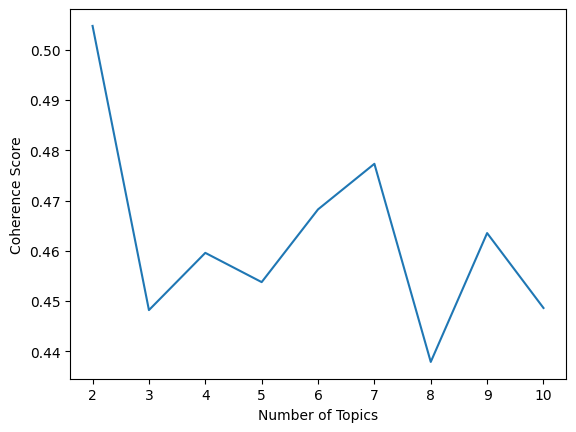

In [ ]:
# 단어 모음(BOW) 생성
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(customer['discount_token_2'].apply(lambda x: ' '.join(x)))

# Gensim의 Dictionary 객체 생성
id2word = Dictionary(customer['discount_token_2'])

# Gensim의 Corpus 객체 생성
corpus = [id2word.doc2bow(text) for text in customer['discount_token_2']]

# 일관성 지수를 계산할 범위 설정
start_topics = 2
end_topics = 10

# 일관성 점수를 저장할 리스트
coherence_scores = []

# 토픽 개수를 바탕으로 일관성 점수 계산
for num_topics in range(start_topics, end_topics + 1):
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

    # Gensim의 CoherenceModel을 사용하여 일관성 계산
    coherence_model_lda = CoherenceModel(model=lda_model, texts=customer['discount_token_2'], dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_score)

# 일관성 점수를 시각화
plt.plot(range(start_topics, end_topics + 1), coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()

# 최적의 토픽 개수 선택
optimal_num_topics = range(start_topics, end_topics + 1)[coherence_scores.index(max(coherence_scores))]

토픽의 개수 : 2개, 3개, 5개로 분류한 경우를 비교하여 결과 판단

In [ ]:
# LDA 모델 생성 및 학습
lda = LatentDirichletAllocation(n_components=2, random_state=1234)  # 토픽의 개수를 2개로 한 경우
lda.fit(X)

# 학습된 LDA 모델의 주제 및 토픽-단어 분포 확인
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    top_feature_indices = topic.argsort()[:-10 - 1:-1]  # 상위 10개 단어 추출
    top_features = [feature_names[i] for i in top_feature_indices]
    print(top_features)
    print()

Topic #1:
['블루', '예매', '조기', '유공', '국가', '장애인', '틔우', '본인', '버드', '얼리']

Topic #2:
['일반', '골드', '그린', '특별', '라흐마니노프', '노블', '대학생', '맞이', 'bye', '2022']



In [ ]:
# LDA 모델 생성 및 학습
lda = LatentDirichletAllocation(n_components=5, random_state=1234)  # 토픽의 개수를 5개로 한 경우
lda.fit(X)

# 학습된 LDA 모델의 주제 및 토픽-단어 분포 확인
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    top_feature_indices = topic.argsort()[:-10 - 1:-1]  # 상위 10개 단어 추출
    top_features = [feature_names[i] for i in top_feature_indices]
    print(top_features)
    print()

Topic #1:
['블루', '틔우', '티켓', '당일', '12월', '버드', '얼리', '3일', '청소년', '1998년']

Topic #2:
['특별', '2월', '9월', '대학생', '28일', '얼리', '버드', '라흐마니노프', 'bye', 'good']

Topic #3:
['골드', '본인', '노블', '맞이', '주년', '27', '150', '탄생', '라흐마니노프', '이하']

Topic #4:
['일반', '그린', '후원', '싹딜', 'lang', '반갑다', '멤버십', '전공', '음악', 'kbs']

Topic #5:
['예매', '조기', '유공', '국가', '장애인', '8월', '3월', '10월', '3일', '동반']



In [ ]:
# LDA 모델 생성 및 학습
lda = LatentDirichletAllocation(n_components=3, random_state=1234)  # 토픽의 개수를 3개로 한 경우
lda.fit(X)

# 학습된 LDA 모델의 주제 및 토픽-단어 분포 확인
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    top_feature_indices = topic.argsort()[:-10 - 1:-1]  # 상위 10개 단어 추출
    top_features = [feature_names[i] for i in top_feature_indices]
    print(top_features)
    print()

Topic #1:
['블루', '예매', '조기', '국가', '유공', '장애인', '틔우', '티켓', '동반', '당일']

Topic #2:
['예매', '조기', '특별', '얼리', '버드', '2월', '12월', '10월', '5일', '16일']

Topic #3:
['일반', '골드', '그린', '노블', '맞이', '싹딜', '본인', '주년', '탄생', '27']



토픽의 개수 = 3으로 선정
- 2개의 경우, 너무 모호하게 구분
- 5개의 경우, 일부 겹치는 토픽 존재

In [ ]:
customer['topic'] = lda.transform(X).argmax(axis=1)

In [ ]:
customer.head() # 총 3개의 토픽으로 파생변수 생성
# 0, 1, 2에 해당하는 토픽을 명칭으로 재정의 필요

key   age gender membership member_yn  member_fee  \
0   18  70.0      M         골드         Y      100000   
1   28  20.0      F       싹틔우미         Y           0   
2   29  50.0      F         블루         Y       40000   
3   38  40.0      M         골드         Y      100000   
4   53  30.0      F         블루         Y       40000   

                 discount_type                      discount discount_%  \
0                    골드회원  30%                     골드회원 30 %        30%   
1                    싹틔우미  40%                     싹틔우미 40 %        40%   
2  라흐마니노프탄생150주년(8매/3.27까지)20%  라흐마니노프탄생150주년 8매/3.27까지 20 %        20%   
3                    골드회원  10%                     골드회원 10 %        10%   
4                     그린회원  5%                      그린회원 5 %         5%   

              discount_text                            discount_token  \
0                     골드회원                                   [골드, 회원]   
1                     싹틔우미                                 [싹, 틔우, 미]   
2  라흐마니노프탄생150주년 8매/3.27까지   [라흐마니노프, 탄생, 150, 주년, 8, 매, /, 3.27, 까지]   
3                     골드회원                                   [골드, 회원]   
4                     그린회원                                   [그린, 회원]   

                 discount_token_2 discount_ticket_num  topic  
0                            [골드]                   1      2  
1                      [싹, 틔우, 미]                   1      0  
2  [라흐마니노프, 탄생, 150, 주년, 8, 3.27]                   8      2  
3                            [골드]                   1      2  
4                            [그린]                   1      2

In [ ]:
df_merge = pd.merge(df2, customer[['key', 'discount_%','discount_text','discount_token_2','discount_ticket_num','topic']], on='key', how='inner')

In [ ]:
# 고객 데이터만 별도 생성
customer.to_csv('LDA_customer.csv', encoding = 'utf-8')

In [ ]:
df_merge.head()
df_merge.to_csv('LDA_dataset.csv', encoding = 'utf-8')

In [ ]:
# 신규 생성된 데이터세트(CSV) 호출

lda_data = pd.read_csv('/content/LDA_dataset.csv', encoding = 'utf8')
lda_data.head()

Unnamed: 0  key   age gender  tran_date  tran_time  play_date  \
0           0   18  70.0      M   20191220       1106   20200211   
1           1   28  20.0      F   20230327       1601   20230523   
2           2   29  50.0      F   20230317       1348   20230523   
3           3   38  40.0      M   20210711       2344   20210919   
4           4   53  30.0      F   20190714       2038   20191120   

   play_st_time         seat  price  ...  running_time intermission  \
0          1930    2층 BOX2 2  42000  ...           120           15   
1          1930  1층 B블록21열 9  66000  ...           150           15   
2          1930  1층 B블록17열 4  88000  ...           150           15   
3          1700  1층 C블록15열 8  99000  ...           110           20   
4          2000   3층 G블록1열 5  38000  ...           100           15   

   member_yn  membership  member_fee discount_%             discount_text  \
0          Y          골드      100000        30%                     골드회원    
1          Y        싹틔우미           0        40%                     싹틔우미    
2          Y          블루       40000        20%  라흐마니노프탄생150주년 8매/3.27까지    
3          Y          골드      100000        10%                     골드회원    
4          Y          블루       40000         5%                     그린회원    

                             discount_token_2  discount_ticket_num topic  
0                                      ['골드']                    1     2  
1                            ['싹', '틔우', '미']                    1     0  
2  ['라흐마니노프', '탄생', '150', '주년', '8', '3.27']                    8     2  
3                                      ['골드']                    1     2  
4                                      ['그린']                    1     2  

[5 rows x 27 columns]

In [ ]:
# 신규 생성된 데이터세트(CSV) 호출

lda_customer = pd.read_csv('/content/LDA_customer.csv', encoding = 'utf8')
lda_customer.head()

Unnamed: 0  key   age gender membership member_yn  member_fee  \
0           0   18  70.0      M         골드         Y      100000   
1           1   28  20.0      F       싹틔우미         Y           0   
2           2   29  50.0      F         블루         Y       40000   
3           3   38  40.0      M         골드         Y      100000   
4           4   53  30.0      F         블루         Y       40000   

                 discount_type                      discount discount_%  \
0                    골드회원  30%                     골드회원 30 %        30%   
1                    싹틔우미  40%                     싹틔우미 40 %        40%   
2  라흐마니노프탄생150주년(8매/3.27까지)20%  라흐마니노프탄생150주년 8매/3.27까지 20 %        20%   
3                    골드회원  10%                     골드회원 10 %        10%   
4                     그린회원  5%                      그린회원 5 %         5%   

              discount_text  \
0                     골드회원    
1                     싹틔우미    
2  라흐마니노프탄생150주년 8매/3.27까지    
3                     골드회원    
4                     그린회원    

                                      discount_token  \
0                                       ['골드', '회원']   
1                                   ['싹', '틔우', '미']   
2  ['라흐마니노프', '탄생', '150', '주년', '8', '매', '/', '...   
3                                       ['골드', '회원']   
4                                       ['그린', '회원']   

                             discount_token_2  discount_ticket_num  topic  
0                                      ['골드']                    1      2  
1                            ['싹', '틔우', '미']                    1      0  
2  ['라흐마니노프', '탄생', '150', '주년', '8', '3.27']                    8      2  
3                                      ['골드']                    1      2  
4                                      ['그린']                    1      2

# 모델링 전처리

## 전처리

In [150]:
lda_customer = pd.read_csv('/content/LDA_customer.csv', encoding = 'utf8', index_col=0)

In [151]:
lda_customer.head()

key   age gender membership member_yn  member_fee  \
0   18  70.0      M         골드         Y      100000   
1   28  20.0      F       싹틔우미         Y           0   
2   29  50.0      F         블루         Y       40000   
3   38  40.0      M         골드         Y      100000   
4   53  30.0      F         블루         Y       40000   

                 discount_type                      discount discount_%  \
0                    골드회원  30%                     골드회원 30 %        30%   
1                    싹틔우미  40%                     싹틔우미 40 %        40%   
2  라흐마니노프탄생150주년(8매/3.27까지)20%  라흐마니노프탄생150주년 8매/3.27까지 20 %        20%   
3                    골드회원  10%                     골드회원 10 %        10%   
4                     그린회원  5%                      그린회원 5 %         5%   

              discount_text  \
0                     골드회원    
1                     싹틔우미    
2  라흐마니노프탄생150주년 8매/3.27까지    
3                     골드회원    
4                     그린회원    

                                      discount_token  \
0                                       ['골드', '회원']   
1                                   ['싹', '틔우', '미']   
2  ['라흐마니노프', '탄생', '150', '주년', '8', '매', '/', '...   
3                                       ['골드', '회원']   
4                                       ['그린', '회원']   

                             discount_token_2  discount_ticket_num  topic  
0                                      ['골드']                    1      2  
1                            ['싹', '틔우', '미']                    1      0  
2  ['라흐마니노프', '탄생', '150', '주년', '8', '3.27']                    8      2  
3                                      ['골드']                    1      2  
4                                      ['그린']                    1      2

In [152]:
df = pd.read_csv('/content/drive/MyDrive/캡스톤_프로젝트/대회_폴더/01. 전처리/df.csv')

In [153]:
df.head()

Unnamed: 0   age gender membership_type_1 membership_type_2  \
0           0  50.0      F                골드                무료   
1           1   NaN    NaN               NaN               NaN   
2           2   NaN    NaN               NaN               NaN   
3           3   NaN    NaN               NaN               NaN   
4           4  50.0      M                무료               NaN   

  membership_type_3 membership_type_4 membership_type_5   tran_date tran_time  \
0                그린               NaN               NaN  2022-01-14  15:12:00   
1               NaN               NaN               NaN  2021-10-03  15:50:00   
2               NaN               NaN               NaN  2022-09-17  15:20:00   
3               NaN               NaN               NaN  2019-06-30  11:32:00   
4               NaN               NaN               NaN  2022-02-06  16:15:00   

    play_date play_st_time          seat   price  ticket_cancel discount_type  \
0  2022-02-04     20:00:00    3층 BOX9 10   10000              2            일반   
1  2021-10-09     20:00:00       1층 7열 5       0              0           초대권   
2  2022-11-05     20:00:00  1층 C블록 16열 3       0              0           초대권   
3  2019-07-31     20:00:00       1층 2열 3       0              0           초대권   
4  2022-03-02     19:30:00   1층 B블록12열 7  180000              0            일반   

   performance_code pre_open_date   open_date genre   place  running_time  \
0               302    2022-01-14  2022-01-15   교향곡    콘서트홀           120   
1              1120           NaN  2021-08-23    독주   리사이틀홀            90   
2              2283    2022-09-11  2022-09-11    독주  IBK챔버홀            80   
3              2798           NaN  2019-07-01    독주   리사이틀홀            90   
4               897    2022-01-09  2022-01-10    독주    콘서트홀            90   

   intermission member_yn  play_year  play_month  play_day   play_dow  stair  \
0            15         Y       2022           2         4     Friday    3.0   
1            15         N       2021          10         9   Saturday    1.0   
2            15         N       2022          11         5   Saturday    1.0   
3            15         N       2019           7        31  Wednesday    1.0   
4             0         Y       2022           3         2  Wednesday    1.0   

  section   row  seat_num  membership_cat  
0    BOX9   NaN        10             1.0  
1     NaN   7.0         5             NaN  
2     C블록  16.0         3             NaN  
3     NaN   2.0         3             NaN  
4     B블록  12.0         7             0.0

In [154]:
df.rename(columns = {'Unnamed: 0': 'key'}, inplace=True)

In [155]:
test = lda_customer.merge(df, on='key', how='left')

In [156]:
test.shape

(107505, 46)

In [157]:
test.head()

key  age_x gender_x membership member_yn_x  member_fee  \
0   18   70.0        M         골드           Y      100000   
1   28   20.0        F       싹틔우미           Y           0   
2   29   50.0        F         블루           Y       40000   
3   38   40.0        M         골드           Y      100000   
4   53   30.0        F         블루           Y       40000   

               discount_type_x                      discount discount_%  \
0                    골드회원  30%                     골드회원 30 %        30%   
1                    싹틔우미  40%                     싹틔우미 40 %        40%   
2  라흐마니노프탄생150주년(8매/3.27까지)20%  라흐마니노프탄생150주년 8매/3.27까지 20 %        20%   
3                    골드회원  10%                     골드회원 10 %        10%   
4                     그린회원  5%                      그린회원 5 %         5%   

              discount_text  \
0                     골드회원    
1                     싹틔우미    
2  라흐마니노프탄생150주년 8매/3.27까지    
3                     골드회원    
4                     그린회원    

                                      discount_token  \
0                                       ['골드', '회원']   
1                                   ['싹', '틔우', '미']   
2  ['라흐마니노프', '탄생', '150', '주년', '8', '매', '/', '...   
3                                       ['골드', '회원']   
4                                       ['그린', '회원']   

                             discount_token_2  discount_ticket_num  topic  \
0                                      ['골드']                    1      2   
1                            ['싹', '틔우', '미']                    1      0   
2  ['라흐마니노프', '탄생', '150', '주년', '8', '3.27']                    8      2   
3                                      ['골드']                    1      2   
4                                      ['그린']                    1      2   

   age_y gender_y membership_type_1 membership_type_2 membership_type_3  \
0   70.0        M                골드                무료               NaN   
1   20.0        F                무료              싹틔우미               NaN   
2   50.0        F                블루                무료               NaN   
3   40.0        M                골드                무료               NaN   
4   30.0        F                블루                무료                그린   

  membership_type_4 membership_type_5   tran_date tran_time   play_date  \
0               NaN               NaN  2019-12-20  11:06:00  2020-02-11   
1               NaN               NaN  2023-03-27  16:01:00  2023-05-23   
2               NaN               NaN  2023-03-17  13:48:00  2023-05-23   
3               NaN               NaN  2021-07-11  23:44:00  2021-09-19   
4               NaN               NaN  2019-07-14  20:38:00  2019-11-20   

  play_st_time         seat  price  ticket_cancel  \
0     19:30:00    2층 BOX2 2  42000              0   
1     19:30:00  1층 B블록21열 9  66000              0   
2     19:30:00  1층 B블록17열 4  88000              0   
3     17:00:00  1층 C블록15열 8  99000              2   
4     20:00:00   3층 G블록1열 5  38000              0   

               discount_type_y  performance_code pre_open_date   open_date  \
0                   골드회원 할인30%                76    2019-12-20  2019-12-23   
1                   싹틔우미 할인40%               221    2023-02-25  2023-02-26   
2  라흐마니노프탄생150주년(8매/3.27까지)20%               221    2023-02-25  2023-02-26   
3                   골드회원 할인10%              2538    2021-07-02  2021-07-03   
4                    그린회원 할인5%              2059           NaN  2019-06-29   

  genre place  running_time  intermission member_yn_y  play_year  play_month  \
0   클래식  콘서트홀           120            15           Y       2020           2   
1   클래식  콘서트홀           150            15           Y       2023           5   
2   클래식  콘서트홀           150            15           Y       2023           5   
3   클래식  콘서트홀           110            20           Y       2021           9   
4   클래식  콘서트홀           100            15           Y       2019          11   

   play_day   play_dow  sta

In [158]:
test.drop(columns = test.filter(regex='_y$').columns, inplace=True)

In [159]:
pd.options.display.max_columns = 42

In [160]:
test.head()

key  age_x gender_x membership member_yn_x  member_fee  \
0   18   70.0        M         골드           Y      100000   
1   28   20.0        F       싹틔우미           Y           0   
2   29   50.0        F         블루           Y       40000   
3   38   40.0        M         골드           Y      100000   
4   53   30.0        F         블루           Y       40000   

               discount_type_x                      discount discount_%  \
0                    골드회원  30%                     골드회원 30 %        30%   
1                    싹틔우미  40%                     싹틔우미 40 %        40%   
2  라흐마니노프탄생150주년(8매/3.27까지)20%  라흐마니노프탄생150주년 8매/3.27까지 20 %        20%   
3                    골드회원  10%                     골드회원 10 %        10%   
4                     그린회원  5%                      그린회원 5 %         5%   

              discount_text  \
0                     골드회원    
1                     싹틔우미    
2  라흐마니노프탄생150주년 8매/3.27까지    
3                     골드회원    
4                     그린회원    

                                      discount_token  \
0                                       ['골드', '회원']   
1                                   ['싹', '틔우', '미']   
2  ['라흐마니노프', '탄생', '150', '주년', '8', '매', '/', '...   
3                                       ['골드', '회원']   
4                                       ['그린', '회원']   

                             discount_token_2  discount_ticket_num  topic  \
0                                      ['골드']                    1      2   
1                            ['싹', '틔우', '미']                    1      0   
2  ['라흐마니노프', '탄생', '150', '주년', '8', '3.27']                    8      2   
3                                      ['골드']                    1      2   
4                                      ['그린']                    1      2   

  membership_type_1 membership_type_2 membership_type_3 membership_type_4  \
0                골드                무료               NaN               NaN   
1                무료              싹틔우미               NaN               NaN   
2                블루                무료               NaN               NaN   
3                골드                무료               NaN               NaN   
4                블루                무료                그린               NaN   

  membership_type_5   tran_date tran_time   play_date play_st_time  \
0               NaN  2019-12-20  11:06:00  2020-02-11     19:30:00   
1               NaN  2023-03-27  16:01:00  2023-05-23     19:30:00   
2               NaN  2023-03-17  13:48:00  2023-05-23     19:30:00   
3               NaN  2021-07-11  23:44:00  2021-09-19     17:00:00   
4               NaN  2019-07-14  20:38:00  2019-11-20     20:00:00   

          seat  price  ticket_cancel  performance_code pre_open_date  \
0    2층 BOX2 2  42000              0                76    2019-12-20   
1  1층 B블록21열 9  66000              0               221    2023-02-25   
2  1층 B블록17열 4  88000              0               221    2023-02-25   
3  1층 C블록15열 8  99000              2              2538    2021-07-02   
4   3층 G블록1열 5  38000              0              2059           NaN   

    open_date genre place  running_time  intermission  play_year  play_month  \
0  2019-12-23   클래식  콘서트홀           120            15       2020           2   
1  2023-02-26   클래식  콘서트홀           150            15       2023           5   
2  2023-02-26   클래식  콘서트홀           150            15       2023           5   
3  2021-07-03   클래식  콘서트홀           110            20       2021           9   
4  2019-06-29   클래식  콘서트홀           100            15       2019          11   

   play_day   play_dow  stair section   row  seat_num  membership_cat  
0        11    Tuesday    2.0    BOX2   NaN         2             1.0  
1        23    Tuesday    1.0     B블록  21.0         9             0.0  
2        23    Tuesday    1.0     B블록  17.0         4             1.0  
3        19     Sunday    1.0     C블록  15.0         8             1.0  
4        20  Wednesday    3.0     G블록   

In [161]:
test['discount_%'] = test['discount_%'].str.replace('%', '').astype(float)
test['weekend'] = test['play_dow'].apply(lambda x: 0 if x in ['Monday', 'Tuesday', 'Wendnesday', 'Thursday'] else 1)
test['quater'] = pd.to_datetime(test['play_date']).dt.quarter

In [162]:
test = test.rename(columns={'gender_x':'성별',
                     'age_x': '나이',
                     'member_fee': '멤버십요금',
                     'discount_%': '할인율',
                     'weekend': '주말여부',
                     'intermission': '휴식비율',
                     'ticket_cancel': '예매취소여부',
                     'quater': '공연분기',
                     'play_dow': '공연일분류',
                     'stair': '층',
                     'intermission': '휴식',
                      'price': '실제지불가격'
                     })

In [163]:
test.columns

Index(['key', '나이', '성별', 'membership', 'member_yn_x', '멤버십요금',
       'discount_type_x', 'discount', '할인율', 'discount_text', 'discount_token',
       'discount_token_2', 'discount_ticket_num', 'topic', 'membership_type_1',
       'membership_type_2', 'membership_type_3', 'membership_type_4',
       'membership_type_5', 'tran_date', 'tran_time', 'play_date',
       'play_st_time', 'seat', '실제지불가격', '예매취소여부', 'performance_code',
       'pre_open_date', 'open_date', 'genre', 'place', 'running_time', '휴식',
       'play_year', 'play_month', 'play_day', '공연일분류', '층', 'section', 'row',
       'seat_num', 'membership_cat', '주말여부', '공연분기'],
      dtype='object')

## (번외)모델 1 : 예매 취소 여부를 기준으로 고객 분류

- 수익(예매 유지)와 위험(예매 취소)로 분류

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = test[['성별','topic','공연분기','나이','층','멤버십요금','할인율','discount_ticket_num', '주말여부', '휴식']]
Y = test[['예매취소여부']]

In [ ]:
df_dummies = pd.get_dummies(X[['성별','topic','공연분기']], drop_first=True)
x_con = X[['나이','층','멤버십요금','할인율','discount_ticket_num', '주말여부', '휴식']]

# 더미 변수와 연속형 변수를 합치기
df_combined = pd.concat([x_con, df_dummies], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_combined, Y, test_size=0.3, random_state=1234)
rf1_model = RandomForestClassifier(n_estimators=150, random_state=1234)
rf1_model.fit(X_train, y_train)

y_pred = rf1_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'정확도: {accuracy}')
print('분류 보고서:')
print(classification_rep)

정확도: 0.6474947290090537
분류 보고서:
              precision    recall  f1-score   support

           0       0.67      0.79      0.72     19008
           2       0.59      0.45      0.51     13244

    accuracy                           0.65     32252
   macro avg       0.63      0.62      0.62     32252
weighted avg       0.64      0.65      0.64     32252



In [ ]:
# 변수 중요도 출력
feature_importances = rf1_model.feature_importances_

# 중요도를 데이터프레임으로 변환하여 출력
df_importances = pd.DataFrame({'Feature': df_combined.columns, 'Importance': feature_importances})
df_importances = df_importances.sort_values(by='Importance', ascending=False)

print("Variable Importances:")
print(df_importances)

Variable Importances:
               Feature  Importance
0                   나이    0.224813
3                  할인율    0.145298
1                    층    0.143485
8                 공연분기    0.139121
2                멤버십요금    0.108871
6                   휴식    0.076192
7                topic    0.059337
5                 주말여부    0.043205
9                 성별_M    0.032429
4  discount_ticket_num    0.027249


## 모델 1 저장

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import pickle
import joblib

In [8]:
joblib.dump(rf1_model, 'rf1_model.pkl')

In [ ]:
rf1_model_load = joblib.load('rf1_model.pkl')

In [ ]:
y_pred = rf1_model_load.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'정확도: {accuracy}')
print('분류 보고서:')
print(classification_rep)

# RandomForest: 예매데이터 기반 티켓구매 예측

- 예매자에 대해서만 진행하는 이유는 예매 취소자에 대한 정보가 없기 때문에, 이를 제외하고 예매자에 대해서만 금액대별 구매의사를 예측한다.

## 전처리

In [25]:
model_data = test[test['예매취소여부']==0]

In [167]:
 model_data = test[(test['play_year'] != 2018) & (test['play_year'] != 2023)]

In [168]:
model_data.head()

key    나이 성별 membership member_yn_x   멤버십요금 discount_type_x   discount  \
0   18  70.0  M         골드           Y  100000       골드회원  30%  골드회원 30 %   
3   38  40.0  M         골드           Y  100000       골드회원  10%  골드회원 10 %   
4   53  30.0  F         블루           Y   40000        그린회원  5%   그린회원 5 %   
6   77  50.0  F         블루           Y   40000       그린회원  20%  그린회원 20 %   
7  105  70.0  F         골드           Y  100000       골드회원  30%  골드회원 30 %   

    할인율 discount_text discount_token discount_token_2  discount_ticket_num  \
0  30.0         골드회원    ['골드', '회원']           ['골드']                    1   
3  10.0         골드회원    ['골드', '회원']           ['골드']                    1   
4   5.0         그린회원    ['그린', '회원']           ['그린']                    1   
6  20.0         그린회원    ['그린', '회원']           ['그린']                    1   
7  30.0         골드회원    ['골드', '회원']           ['골드']                    1   

   topic membership_type_1 membership_type_2 membership_type_3  \
0      2                골드                무료               NaN   
3      2                골드                무료               NaN   
4      2                블루                무료                그린   
6      2                블루                무료                그린   
7      2                골드                무료                그린   

  membership_type_4 membership_type_5   tran_date tran_time  ...  \
0               NaN               NaN  2019-12-20  11:06:00  ...   
3               NaN               NaN  2021-07-11  23:44:00  ...   
4               NaN               NaN  2019-07-14  20:38:00  ...   
6               NaN               NaN  2021-09-12  15:34:00  ...   
7               NaN               NaN  2022-06-04  00:54:00  ...   

           seat  실제지불가격 예매취소여부  performance_code  pre_open_date   open_date  \
0     2층 BOX2 2   42000      0                76     2019-12-20  2019-12-23   
3   1층 C블록15열 8   99000      2              2538     2021-07-02  2021-07-03   
4    3층 G블록1열 5   38000      0              2059            NaN  2019-06-29   
6  1층 B블록14열 11  120000      2              1169     2021-09-03  2021-09-05   
7    1층 C블록8열 4   49000      2               236     2022-04-24  2022-04-25   

  genre place running_time  휴식  play_year  play_month  play_day      공연일분류  \
0   클래식  콘서트홀          120  15       2020           2        11    Tuesday   
3   클래식  콘서트홀          110  20       2021           9        19     Sunday   
4   클래식  콘서트홀          100  15       2019          11        20  Wednesday   
6   클래식  콘서트홀          120  15       2021          10        28   Thursday   
7   클래식  콘서트홀          100  15       2022           6        21    Tuesday   

     층 section   row seat_num  membership_cat  주말여부  공연분기  
0  2.0    BOX2   NaN        2             1.0     0     1  
3  1.0     C블록  15.0        8             1.0     1     3  
4  3.0     G블록   1.0        5             1.0     1     4  
6  1.0     B블록  14.0       11             1.0     0     4  
7  1.0     C블록   8.0        4             1.0     0     2  

[5 rows x 44 columns]

<Axes: ylabel='Frequency'>

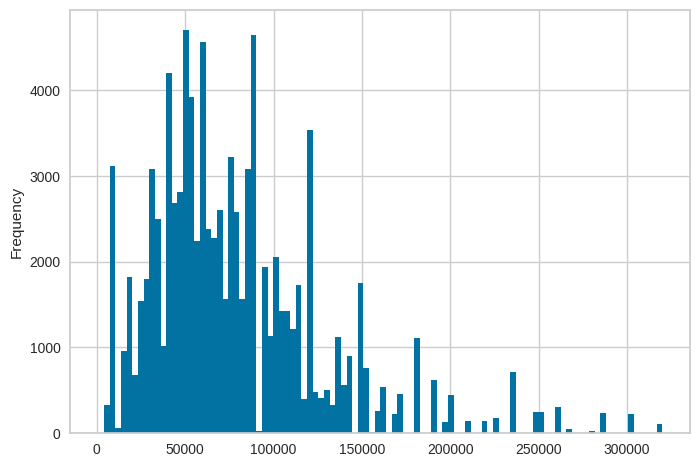

In [169]:
model_data['실제지불가격'].plot(kind='hist', bins=100)

## 가격구간별 모델 설정

In [148]:
df_rfm.head()

key   ID    나이  성별  공연년도  멤버십등급  공연요일  Recency  Frequency  Monetary  \
0   18  121  70.0   0  2020      4     1      357         46     42000   
1   53   35  30.0   1  2019      3     2      164        251     38000   
2  145  197  30.0   0  2022      0     2      294        446     84000   
3  285  201  50.0   0  2022      0     1       94        217    130000   
4  293   16  20.0   1  2019      1     2       62        734     40000   

   Recency_score  Frequency_score  Monetary_score  RF_score  Total_score  \
0              1                1               1        11            3   
1              2                2               1        22            5   
2              1                2               2        12            4   
3              3                1               3        31            9   
4              3                3               1        33            7   

          segment  cluster  
0     Hibernating        1  
1  Need Attention        2  
2         At-Risk        1  
3   New Customers        2  
4       Champions        3

In [181]:
merge_df = model_data.merge(df_rfm, on = 'key', suffixes=('_left', '_right'))

In [187]:
duplicates_cols = [col for col in merge_df.columns.to_list() if "right" in col]

In [188]:
merge_df.drop(columns = duplicates_cols, inplace = True)

In [189]:
merge_df.head()

key  나이_left 성별_left membership member_yn_x   멤버십요금  \
0   18     70.0       M         골드           Y  100000   
1   53     30.0       F         블루           Y   40000   
2  145     30.0       M         무료           Y       0   
3  285     50.0       M         무료           Y       0   
4  293     20.0       F       싹틔우미           Y       0   

           discount_type_x                discount   할인율       discount_text  \
0                골드회원  30%               골드회원 30 %  30.0               골드회원    
1                 그린회원  5%                그린회원 5 %   5.0               그린회원    
2  조기예매  (1인8매/3월11일까지)30%  조기예매 1인8매/3월11일까지 30 %  30.0  조기예매 1인8매/3월11일까지    
3                       일반                      일반   NaN                  일반   
4                       일반                      일반   NaN                  일반   

                                      discount_token  \
0                                       ['골드', '회원']   
1                                       ['그린', '회원']   
2  ['조기', '예매', '1', '인', '8', '매', '/', '3월', '1...   
3                                             ['일반']   
4                                             ['일반']   

                      discount_token_2  discount_ticket_num  topic  \
0                               ['골드']                    1      2   
1                               ['그린']                    1      2   
2  ['조기', '예매', '1', '8', '3월', '11일']                    8      0   
3                               ['일반']                    1      2   
4                               ['일반']                    1      2   

  membership_type_1 membership_type_2 membership_type_3 membership_type_4  \
0                골드                무료               NaN               NaN   
1                블루                무료                그린               NaN   
2                무료               NaN               NaN               NaN   
3                무료               NaN               NaN               NaN   
4                무료              싹틔우미               NaN               NaN   

  membership_type_5   tran_date tran_time  ...    층 section   row  seat_num  \
0               NaN  2019-12-20  11:06:00  ...  2.0    BOX2   NaN         2   
1               NaN  2019-07-14  20:38:00  ...  3.0     G블록   1.0         5   
2               NaN  2022-03-08  23:39:00  ...  1.0     D블록   6.0         1   
3               NaN  2022-09-23  15:03:00  ...  1.0     D블록  22.0         1   
4               NaN  2019-10-26  03:10:00  ...  3.0     F블록   5.0         5   

   membership_cat  주말여부 공연분기   ID  공연년도 멤버십등급  공연요일  Recency  Frequency  \
0             1.0     0    1  121  2020     4     1      357         46   
1             1.0     1    4   35  2019     3     2      164        251   
2             0.0     1    2  197  2022     0     2      294        446   
3             0.0     0    4  201  2022     0     1       94        217   
4             0.0     1    4   16  2019     1     2       62        734   

   Monetary  Recency_score Frequency_score  Monetary_score RF_score  \
0     42000              1               1               1       11   
1     38000              2               2               1       22   
2     84000              1               2               2       12   
3    130000              3               1               3       31   
4     40000              3               3               1       33   

   Total_score         segment  cluster  
0            3     Hibernating        1  
1            5  Need Attention        2  
2            4         At-Risk        1  
3            9   New Customers        2  
4            7       Champions        3  

[5 rows x 58 columns]

In [170]:
# clustering 처리 전
# df_dummies = pd.get_dummies(model_data[['성별', 'topic', '공연분기', '공연일분류']], dtype = int, drop_first=True)
# x_con = model_data[['key', '나이', '층','멤버십요금','할인율', 'discount_ticket_num', '주말여부', '휴식']]

# # 더미 변수와 연속형 변수를 합치기
# X_model2 = pd.concat([x_con, df_dummies], axis=1)
# X_model2.head()

key    나이    층   멤버십요금   할인율  discount_ticket_num  주말여부  휴식  topic  공연분기  \
0   18  70.0  2.0  100000  30.0                    1     0  15      2     1   
3   38  40.0  1.0  100000  10.0                    1     1  20      2     3   
4   53  30.0  3.0   40000   5.0                    1     1  15      2     4   
6   77  50.0  1.0   40000  20.0                    1     0  15      2     4   
7  105  70.0  1.0  100000  30.0                    1     0  15      2     2   

   성별_M  공연일분류_Saturday  공연일분류_Sunday  공연일분류_Thursday  공연일분류_Tuesday  \
0     1               0             0               0              1   
3     1               0             1               0              0   
4     0               0             0               0              0   
6     0               0             0               1              0   
7     0               0             0               0              1   

   공연일분류_Wednesday  
0                0  
3                0  
4                1  
6                0  
7                0

In [190]:
merge_df.columns

Index(['key', '나이_left', '성별_left', 'membership', 'member_yn_x', '멤버십요금',
       'discount_type_x', 'discount', '할인율', 'discount_text', 'discount_token',
       'discount_token_2', 'discount_ticket_num', 'topic', 'membership_type_1',
       'membership_type_2', 'membership_type_3', 'membership_type_4',
       'membership_type_5', 'tran_date', 'tran_time', 'play_date',
       'play_st_time', 'seat', '실제지불가격', '예매취소여부', 'performance_code',
       'pre_open_date', 'open_date', 'genre', 'place', 'running_time', '휴식',
       'play_year', 'play_month', 'play_day', '공연일분류', '층', 'section', 'row',
       'seat_num', 'membership_cat', '주말여부', '공연분기', 'ID', '공연년도', '멤버십등급',
       '공연요일', 'Recency', 'Frequency', 'Monetary', 'Recency_score',
       'Frequency_score', 'Monetary_score', 'RF_score', 'Total_score',
       'segment', 'cluster'],
      dtype='object')

In [197]:
# clustering 적용 후
df_dummies = pd.get_dummies(merge_df[['성별_left', '공연분기']], dtype = int, drop_first=True)
x_con = merge_df[['key', '나이_left', 'topic', '멤버십등급', '층', '멤버십요금', '할인율', 'discount_ticket_num', '주말여부', '휴식', 'Recency', 'Frequency', 'Monetary']]

# 더미 변수와 연속형 변수를 합치기
X_model2 = pd.concat([x_con, df_dummies], axis=1)
X_model2.head()

key  나이_left  topic  멤버십등급    층   멤버십요금   할인율  discount_ticket_num  주말여부  \
0   18     70.0      2      4  2.0  100000  30.0                    1     0   
1   53     30.0      2      3  3.0   40000   5.0                    1     1   
2  145     30.0      0      0  1.0       0  30.0                    8     1   
3  285     50.0      2      0  1.0       0   NaN                    1     0   
4  293     20.0      2      1  3.0       0   NaN                    1     1   

   휴식  Recency  Frequency  Monetary  공연분기  성별_left_M  
0  15      357         46     42000     1          1  
1  15      164        251     38000     4          0  
2  15      294        446     84000     2          1  
3  20       94        217    130000     4          1  
4  15       62        734     40000     4          0

In [198]:
X_model2.shape

(51179, 15)

In [199]:
X_model2['key'].max()

1920743

## 모델링

In [200]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np
from scipy.stats import mode

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

<Axes: >

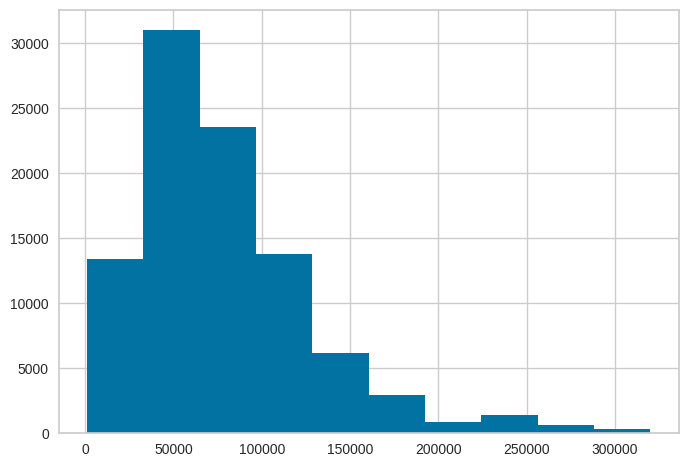

In [201]:
model_data['실제지불가격'].hist()

In [202]:
# target value: 해당 가격에서의 구매 여부. '실제지불가격'을 이동시키면서 예측하려고 함.
class PriceModelTrainer:
    def __init__(self, model_data, X_data):
        self.model_data = model_data
        self.X_model2 = X_data
        self.n = 5
        self.rs = 1234
        self.predictions_by_price = {}  # 가격별 예측값 저장
        self.ls_price = []
        self.cmap_cv = plt.cm.coolwarm
        self.cmap_data = plt.cm.Paired

    def create_Y(self, value, price):
        return 1 if value >= price else 0 # value: 실제 지불 가격, 고객이 생각하는 가치(value)보다 판매가격(price)이 낮으면 사람들이 구매(1)

    def train_model(self, price):
        # 해당 가격에 대한 Y 생성
        Y_model2 = self.model_data['실제지불가격'].apply(lambda value: self.create_Y(value, price))

        # Split
        X_train, X_test, y_train, y_test = train_test_split(self.X_model2, Y_model2, test_size=0.2, random_state=1234, stratify=Y_model2)

        # 저장
        self.X_train = X_train
        self.X_test = X_test
        self.y_test = y_test

        # 해당 가격에 대한 예측값 저장소
        preds = []
        self.preds_prob = []
        test_predictions = None

        # K-fold, 80% train_set
        self.skf = StratifiedKFold(n_splits=self.n, shuffle=True, random_state=self.rs)

        for train_idx, val_idx in self.skf.split(X_train, y_train):
            X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            self.rf_model = RandomForestClassifier(n_estimators=100, random_state=self.rs)
            self.rf_model.fit(X_fold_train, y_fold_train)

            # Validation set predictions
            pred = self.rf_model.predict(X_fold_val)
            pred_prob = self.rf_model.predict_proba(X_fold_val)[:, 1]
            preds.extend(pred)
            self.preds_prob.extend(pred_prob)

            # Test set predictions
            if test_predictions is None:
                test_predictions = self.rf_model.predict(X_test)
            else:
                test_predictions = np.vstack((test_predictions, self.rf_model.predict(X_test)))

        # 최종 test predictions (majority voting)
        if test_predictions.ndim > 1:
            test_predictions = mode(test_predictions, axis=0)[0].flatten()

        # 해당 가격에 대한 예측값 저장
        self.predictions_by_price[price] = {
            'train': (X_train.index, preds),
            'test': (X_test.index, test_predictions)
        }

    def train_all_models(self, price_list):
        self.ls_price = price_list
        self.predictions_by_price = {}  # Reset predictions
        for price in price_list:
            self.train_model(price)

    def get_pred_df(self):
        pred_df = self.X_model2[['key']].copy()

        for price in self.ls_price:
            train_idx, train_preds = self.predictions_by_price[price]['train']
            test_idx, test_preds = self.predictions_by_price[price]['test']

            # 예측값 결합
            all_predictions = pd.Series(index=self.X_model2.index, dtype=int)
            all_predictions.loc[train_idx] = train_preds
            all_predictions.loc[test_idx] = test_preds

            pred_df[f'pred_{price}'] = all_predictions

        return pred_df

    def evaluate_model(self):
        metrics_by_price = {}

        for price in self.ls_price:
            train_idx, train_preds = self.predictions_by_price[price]['train']
            test_idx, test_preds = self.predictions_by_price[price]['test']

            # Get true values
            Y_true = self.model_data['실제지불가격'].apply(lambda value: self.create_Y(value, price))

            # Calculate metrics
            train_metrics = {
                'accuracy': 0,
                'f1': 0,
                'precision': 0,
                'recall': 0,
                'roc_auc_score': 0,
                'confusion_matrix': np.zeros((2, 2), dtype=int)
            }

            test_probs = self.rf_model.predict_proba(self.X_test)[:, 1]

            # StratifiedKFold 분할 시 클래스 비율 유지하려면 y값 전달 필요
            for train_idx, val_idx in self.skf.split(self.X_train, Y_true.loc[self.X_train.index]):
              y_true_fold = Y_true.loc[self.X_train.index[val_idx]]
              y_pred_fold = np.array(self.preds_prob)[val_idx]

              # train_metrics 업데이트, 메트릭 계산을 위해서 확률값을 이진값으로 분류(threshold = 0.5)
              # 정밀도(precision)를 높이려면 0.5보다 높게, 재현율(recall)을 높이려면 0.5보다 낮게
              train_metrics['accuracy'] += accuracy_score(y_true_fold, y_pred_fold > 0.7)
              train_metrics['f1'] += f1_score(y_true_fold, y_pred_fold > 0.7)
              train_metrics['precision'] += precision_score(y_true_fold, y_pred_fold > 0.7)
              train_metrics['recall'] += recall_score(y_true_fold, y_pred_fold > 0.7)
              train_metrics['roc_auc_score'] += roc_auc_score(y_true_fold, y_pred_fold)
              train_metrics['confusion_matrix'] += confusion_matrix(y_true_fold, y_pred_fold > 0.7)

            # Average train metrics
            n_splits = self.skf.get_n_splits()
            for key in train_metrics:
                if key != 'confusion_matrix':
                    train_metrics[key] /= n_splits

            test_metrics = {
                'accuracy': accuracy_score(self.y_test, test_preds),
                'f1': f1_score(self.y_test, test_preds),
                'precision': precision_score(self.y_test, test_preds),
                'recall': recall_score(self.y_test, test_preds),
                'roc_auc_score': roc_auc_score(self.y_test, test_probs),
                'confusion_matrix': confusion_matrix(self.y_test, test_preds)
            }

            metrics_by_price[price] = {
                'train': train_metrics,
                'test': test_metrics
            }

        return metrics_by_price

    def visualize_groups(self, classes, groups, name):
        fig, ax = plt.subplots()
        ax.scatter(range(len(groups)),
            [0.5] * len(groups),
            c=groups,
            marker="_",
            lw=50,
            cmap=self.cmap_data,)
        ax.scatter(range(len(groups)),
            [3.5] * len(groups),
            c=classes,
            marker="_",
            lw=50,
            cmap=self.cmap_data,)
        ax.set(ylim=[-1, 5],
            yticks=[0.5, 3.5],
            yticklabels=["Data\ngroup", "Data\nclass"],
            xlabel="Sample index",)
        plt.title(name)
        plt.show()

    def plot_cv_indices(self, cv, X, y, group, ax, n_splits, lw=25):
        # 각 CV 분할에 대한 시각화
        for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
            indices = np.array([np.nan] * len(X))
            indices[tt] = 1
            indices[tr] = 0

            ax.scatter(
                range(len(indices)),
                [ii + 0.5] * len(indices),
                c=indices,
                marker="_",
                lw=lw,
                cmap=self.cmap_cv,
                vmin=-0.2,
                vmax=1.2,
            )

        # 데이터 클래스와 그룹 플롯
        ax.scatter(
            range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=self.cmap_data
        )

        if group is not None:
            ax.scatter(
                range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=self.cmap_data
            )
            yticklabels = list(range(n_splits)) + ["class", "group"]
            ylim = [n_splits + 2.2, -0.2]
        else:
            yticklabels = list(range(n_splits)) + ["class"]
            ylim = [n_splits + 1.2, -0.2]

        ax.set(
            yticks=np.arange(len(yticklabels)) + 0.5,
            yticklabels=yticklabels,
            xlabel="Sample index",
            ylabel="CV iteration",
            ylim=ylim,
            xlim=[0, len(X)],
        )
        ax.set_title(f"{type(cv).__name__} - Price: {self.current_price}", fontsize=15)
        return ax

    def plot_cv_splits(self, price, n_splits=5, groups=None): #특정 가격에 대한 CV 분할을 시각화
        self.current_price = price  # 현재 가격 저장

        # 해당 가격에 대한 Y 생성
        Y_model2 = self.model_data['실제지불가격'].apply(lambda value: self.create_Y(value, price))

        # CV 객체 생성
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=self.rs)

        # 그래프 생성
        fig, ax = plt.subplots(figsize=(15, 5))
        self.plot_cv_indices(cv, self.X_model2, Y_model2, groups, ax, n_splits)

        # 범례 추가
        ax.legend(
            [Patch(color=self.cmap_cv(0.8)), Patch(color=self.cmap_cv(0.02))],
            ["Testing set", "Training set"],
            loc=(1.02, 0.8),
        )

        plt.tight_layout()
        fig.subplots_adjust(right=0.7)
        plt.show()

    def plot_data_distribution(self, price): # 데이터 분포 시각화
        Y_model2 = self.model_data['실제지불가격'].apply(lambda value: self.create_Y(value, price))

        # 임의의 그룹 생성 (예: 10개 그룹으로 나누기)
        groups = np.array([i // (len(self.X_model2) // 10) for i in range(len(self.X_model2))])

        self.visualize_groups(Y_model2, groups, f'Data Distribution - Price: {price}')

In [204]:
ls_price = list(range(10000, 140000, 10000))

trainer = PriceModelTrainer(merge_df, X_model2)
trainer.train_all_models(ls_price)

In [205]:
df_rf = trainer.get_pred_df()

In [206]:
df_rf.head()

key  pred_10000  pred_20000  pred_30000  pred_40000  pred_50000  \
0   18         1.0         1.0         0.0         1.0         1.0   
1   53         1.0         1.0         1.0         0.0         1.0   
2  145         1.0         1.0         1.0         1.0         1.0   
3  285         1.0         1.0         1.0         1.0         1.0   
4  293         1.0         1.0         1.0         1.0         1.0   

   pred_60000  pred_70000  pred_80000  pred_90000  pred_100000  pred_110000  \
0         0.0         1.0         0.0         0.0          1.0          0.0   
1         1.0         0.0         0.0         1.0          1.0          0.0   
2         1.0         1.0         1.0         1.0          0.0          0.0   
3         1.0         1.0         0.0         1.0          1.0          0.0   
4         1.0         1.0         1.0         0.0          0.0          0.0   

   pred_120000  pred_130000  
0          0.0          0.0  
1          0.0          0.0  
2          0.0          0.0  
3          0.0          0.0  
4          0.0          0.0

In [241]:
trainer.evaluate_model()

{10000: {'train': {'accuracy': 0.13716622313715365,
   'f1': 0.23376186751598738,
   'precision': 0.9955584476273385,
   'recall': 0.13243392914659763,
   'roc_auc_score': 0.5092152358581168,
   'confusion_matrix': array([[  227,    24],
          [35303,  5389]])},
  'test': {'accuracy': 0.1363813989839781,
   'f1': 0.23303834808259588,
   'precision': 0.13201612110488548,
   'recall': 0.9926090169992609,
   'roc_auc_score': 1.0,
   'confusion_matrix': array([[  53, 8830],
          [  10, 1343]])}},
 20000: {'train': {'accuracy': 0.18134952084316283,
   'f1': 0.23156967338750398,
   'precision': 0.9329469246028925,
   'recall': 0.13220081502902034,
   'roc_auc_score': 0.5000502764225401,
   'confusion_matrix': array([[ 2374,   362],
          [33156,  5051]])},
  'test': {'accuracy': 0.18083235638921455,
   'f1': 0.2313685947382895,
   'precision': 0.13206362494767684,
   'recall': 0.9327420546932742,
   'roc_auc_score': 1.0,
   'confusion_matrix': array([[ 589, 8294],
          [  9

## CV 시각화
- 가격별 target class 확인
- iter별 training, test set 분포 확인

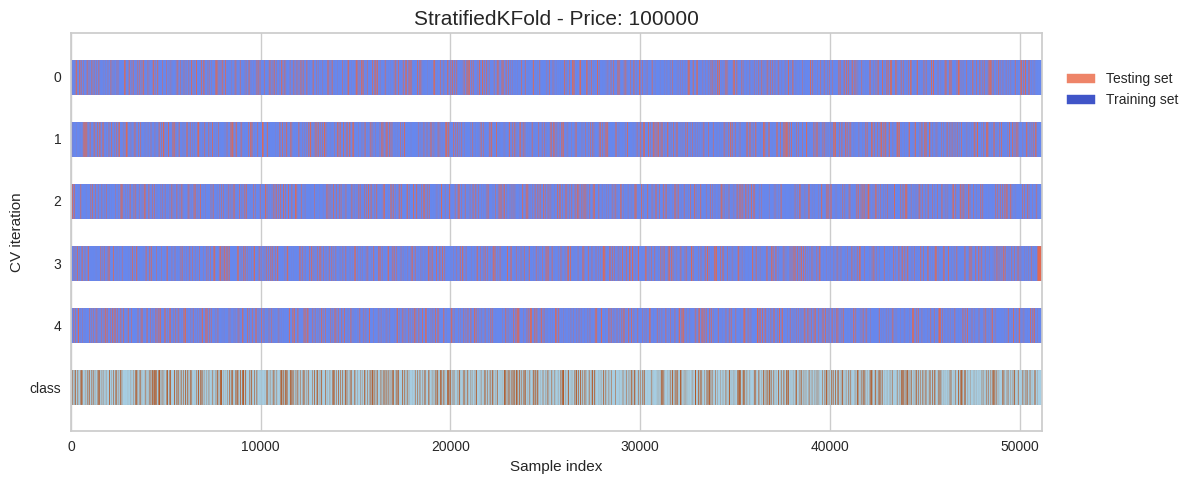

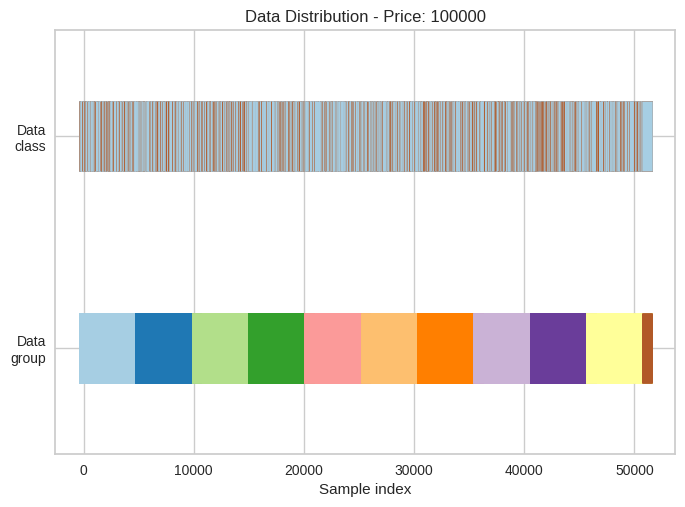

In [207]:
# 특정 가격에 대한 CV 분할 시각화
trainer.plot_cv_splits(price=100000, n_splits=5)

# 데이터 분포 시각화
trainer.plot_data_distribution(price=100000)

In [208]:
model_data['실제지불가격'].head()

0     42000
3     99000
4     38000
6    120000
7     49000
Name: 실제지불가격, dtype: int64

In [209]:
df_rf.to_csv('/content/drive/MyDrive/캡스톤_프로젝트/df_result.csv', index=False)

In [ ]:
# df_rf.head(2)

# Customer Segmentation & Clustering

## Data Preprocessing

### type 정리

In [27]:
df = pd.read_csv('/content/df.csv', index_col = 0)

pd.set_option('display.max_columns', None)

df = df[(df['공연년도'] != 2018) & (df['공연년도'] != 2023)]
df = df[df['예매취소여부'] == 0]

df.shape

(51179, 39)

In [28]:
df_cleansing = df[['key', '나이', '성별', '선예매시작일', '예매거래일자', '예매거래시간', '공연날짜', '공연시작시간', '공연코드', '공연년도', '공연월', '공연요일', '층', '구역', '좌석열', '멤버십등급', '할인율', 'discount_ticket_num', '최종예매가격']]

In [29]:
df_cleansing.loc[:,'좌석열'] = df_cleansing['좌석열'].fillna(0)

In [30]:
#시간 타입 변경
df_cleansing.loc[:, '선예매시작일'] = pd.to_datetime(df_cleansing['선예매시작일'])
df_cleansing.loc[:, '예매거래일자'] = pd.to_datetime(df_cleansing['예매거래일자'])
df_cleansing.loc[:, '예매거래시간'] = pd.to_datetime(df_cleansing['예매거래시간'], format = '%H:%M:%S').dt.time
df_cleansing.loc[:, '공연날짜'] = pd.to_datetime(df_cleansing['공연날짜'])
df_cleansing.loc[:, '공연시작시간'] = pd.to_datetime(df_cleansing['공연시작시간'], format = '%H:%M:%S').dt.time

In [31]:
#할인율 정리
df_cleansing.loc[:, '할인율'].value_counts()
df_cleansing.loc[:, '할인율'] = df_cleansing['할인율'].fillna(0)
df_cleansing.loc[:, '할인율'] = df_cleansing['할인율'].str.extract('(\d+)')

In [ ]:
# #가격 역산(case2)
# df_cleansing['할인율'] = df_cleansing['할인율'].fillna(1)
# df_cleansing['할인율'] = df_cleansing['할인율'].astype(int)
# df_cleansing['원가'] = df_cleansing['최종예매가격'] / (1 - df_cleansing['할인율'] / 100)

### 인코딩

| 성별 | 인코딩 |
| --- | --- |
| M | 0 |
| F | 1 |

-----------------

| 공연요일 | 인코딩 |
|--|--|
|Monday|0|
|Tuesday|1|
|Wednesday|2|
|Thursday|3|
|Friday|4|
|Saturday|5|
|Sunday|6|

----------------

|멤버십등급|인코딩|
|-|-|
|무료|0|
|싹틔우미|1|
|그린|2|
|블루|3|
|골드|4|
|노블|5|

In [32]:
def en_gender(x):
    mapping = {'M': 0,
              'F': 1}
    return mapping[x]

def en_day(x):
    mapping = {'Monday': 0,
              'Tuesday': 1,
              'Wednesday': 2,
              'Thursday': 3,
              'Friday': 4,
              'Saturday': 5,
              'Sunday': 6}
    return mapping[x]

def en_mem(x):
    mapping = {'무료': 0,
              '싹틔우미': 1,
              '그린': 2,
              '블루': 3,
              '골드': 4,
              '노블': 5}
    return mapping[x]

In [33]:
df_cleansing.loc[:, '성별'] = df_cleansing['성별'].map(en_gender)
df_cleansing.loc[:, '공연요일'] = df_cleansing['공연요일'].map(en_day)
df_cleansing.loc[:, '멤버십등급'] = df_cleansing['멤버십등급'].map(en_mem)

In [35]:
df_cleansing.to_csv('/content/df_cleansing.csv', index=False)

## RFM Analysis

### Recency

1. 누가 얼마나 최근에 예매했는가?

2. 최근 예매거래일자를 활용해서, 'df_cleansing'의 예매거래일자와의 차이를 구해서 recency를 구하는 것이 목표

3. 최근 예매거래일자를 구하려면 개개인에 대한 식별이 필요
 - 문제상황: 개개인 식별코드가 부존
 - 해결방법: 가정을 통한 임의 부여
  1) 개인 식별 ID 생성: 공연년도+나이+성별+멤버십등급을 통해 개인 -> 고객군으로 분류 (ex: 1000명의 개인 -> 2020년 20대 골드멤버십인 남성 고객군)
  2) 전체 데이터셋에서 좌석번호 컬럼을 제외한 데이터 중복여부 계산: 여기서 중복이 발생한다는 것은 개인이 중복으로 표를 샀다는 의미 -> 개인별 ID 부여
 - 선택: 1번 방법 채택(개개인을 고객군으로 만들어서 ID부여)
 - 이유: 2번 방법의 경우는 데이터 중복계산시 예매일자까지 포함한 중복을 의미하기 때문에, 그냥 예매일자 자체가 최근예매일이 된다. 그러면 고객별 최근예매일은 전부 0이 될 것이다. 따라서, Recency 기준을 만들어야 하는데 그 해의 마지막 공연일을 기준으로 잡거나 해야함(개인적인 판단으로는 공연마다 선호하는 공연이 다를 것이기 때문에, 그 해의 마지막 공연이 최근예매일의 기준이 될 수 없다고 판단함. -> 공연별 데이터(공연 타입, 공연팀 등 세부사항 등)가 있었으면 공연별로 최근예매일을 구해볼 수는 있었을 것 같음)

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [38]:
df_cleansing = pd.read_csv('/content/df_cleansing.csv')

In [ ]:
# df_cleansing = df_cleansing.merge(df_rf, on = 'key', how = 'right')
# df_cleansing.drop(columns = ['나이_y'], axis = 1, inplace = True)
# df_cleansing.rename(columns = {'나이_x':'나이'}, inplace = True)

In [39]:
last_date_dataset = df_cleansing.groupby(['공연년도', '멤버십등급', '나이', '성별'])[['예매거래일자']].max().reset_index()
last_date_dataset = last_date_dataset.reset_index()

In [40]:
last_date_dataset.rename(columns = {'index': 'ID'}, inplace = True)

# 회원 특성별 최대 예매거래일자
last_date_dataset.rename(columns={'예매거래일자': '최근예매일자'}, inplace = True)

In [41]:
last_date_dataset.shape

(264, 6)

In [42]:
df_cleansing.shape

(51179, 19)

1. 회원ID가 없기 때문에, 회원의 멤버십등급+나이+성별을 ID로 만들어서 사용(총 251개의 ID 생성)
2. df_cleansing에 ID를 만들어서 차이를 구하는 방법 or df_cleansing을 연도별로 나눠서 apply하는 방법

==> 1번 선택

In [43]:
# ID 생성
last_date_dataset['회원특성'] = last_date_dataset['공연년도'].astype(str)+last_date_dataset['멤버십등급'].astype(str)+last_date_dataset['나이'].astype(str)+last_date_dataset['성별'].astype(str)
last_date_dataset['회원특성'].nunique()

264

In [44]:
df_cleansing.loc[:, '회원특성'] = df_cleansing['공연년도'].astype(str)+df_cleansing['멤버십등급'].astype(str)+df_cleansing['나이'].astype(str)+df_cleansing['성별'].astype(str)
df_cleansing['회원특성'].nunique()

264

- 각 테이블에 회원특성 생성 완료 -> 두 테이블에 ID 생성 후, RFM계산

In [45]:
display(last_date_dataset.head(1)), display(df_cleansing.head(1)), print(last_date_dataset.shape, df_cleansing.shape)

ID  공연년도  멤버십등급    나이  성별               최근예매일자        회원특성
0   0  2019      0  20.0   0  2019-12-27 00:00:00  2019020.00

key    나이  성별               선예매시작일               예매거래일자    예매거래시간  \
0   18  70.0   0  2019-12-20 00:00:00  2019-12-20 00:00:00  11:06:00   

                  공연날짜    공연시작시간  공연코드  공연년도  공연월  공연요일    층    구역  좌석열  \
0  2020-02-11 00:00:00  19:30:00    76  2020    2     1  2.0  BOX2  0.0   

   멤버십등급  할인율  discount_ticket_num  최종예매가격        회원특성  
0      4  NaN                    1   42000  2020470.00

(264, 7) (51179, 20)


(None, None, None)

In [46]:
df_cleansing = df_cleansing.merge(last_date_dataset, how='left')

In [47]:
df_cleansing['예매거래일자'] = pd.to_datetime(df_cleansing['예매거래일자'])
df_cleansing['최근예매일자'] = pd.to_datetime(df_cleansing['최근예매일자'])
df_cleansing['Recency'] = df_cleansing['최근예매일자'] - df_cleansing['예매거래일자']
df_cleansing['Recency'] = df_cleansing['Recency'].dt.days

#### histogram

In [48]:
fig = px.histogram(df_cleansing, x='Recency', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Recency Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

- Recency 분포의 중위값은 166일(당해년도 기준, 해당 고객군의 최근예매일 - 단위고객의 최근예매일자)

In [49]:
customer_group = df_cleansing.groupby(['ID'])[['Recency']].count().reset_index()
recency_age = df_cleansing.groupby(['나이'])[['Recency']].median().reset_index()
recency_gender = df_cleansing.groupby(['성별'])[['Recency']].median().reset_index()
recency_membership = df_cleansing.groupby(['멤버십등급'])[['Recency']].median().reset_index()

In [50]:
display(customer_group)
display(recency_age)
display(recency_gender)
display(recency_membership)

ID  Recency
0      0        2
1      1      421
2      2      863
3      3      426
4      4     1055
..   ...      ...
259  259       60
260  260       69
261  261       91
262  262       71
263  263       22

[264 rows x 2 columns]

나이  Recency
0  10.0     90.0
1  20.0    146.0
2  30.0    167.0
3  40.0    161.0
4  50.0    173.0
5  60.0    170.0
6  70.0    166.0
7  80.0    124.0

성별  Recency
0   0    160.0
1   1    167.0

멤버십등급  Recency
0      0    160.0
1      1    154.0
2      2    168.0
3      3    167.0
4      4    169.0
5      5    127.0

In [51]:
fig = make_subplots(rows=2, cols=2, subplot_titles=['Customer Group', 'Age', 'Gender', 'Membership'])

dataframes = [customer_group, recency_age, recency_gender, recency_membership]

for i in range(1, 5):
    row = (i - 1) // 2 + 1
    col = i % 2 if i % 2 != 0 else 2

    # 여기에 해당 subplot에 대한 데이터 설정
    subplot_data = dataframes[i - 1]

    # 히스토그램 생성
    subplot_fig = px.histogram(subplot_data, x=subplot_data.columns[0], y='Recency', opacity=0.85, marginal='box', nbins = 500)
    subplot_fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

    # subplot을 행(row) 및 열(col) 위치에 추가
    fig.add_trace(subplot_fig['data'][0], row=row, col=col)

# subplot 레이아웃 설정
fig.update_layout(title_text='Recency Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20),
                  showlegend=False)# 전체 레이아웃에서 범례는 한 번만 표시되도록 설정

# 전체 그림 출력
fig.show()

In [ ]:
import gc
gc.collect()

### Frequency

- 누가 얼마나 자주 구매했는가?

In [52]:
test = df_cleansing[['ID', '나이', '성별', '예매거래일자', '예매거래시간', '공연날짜', '공연시작시간', '공연코드', '공연년도', '공연월', '공연요일', '층', '구역', '멤버십등급', 'discount_ticket_num', '최종예매가격']]
test = test.groupby(['ID', '나이', '성별', '예매거래일자', '예매거래시간', '공연날짜', '공연시작시간', '공연코드', '공연년도', '공연월', '공연요일', '층', '구역', '멤버십등급'], as_index=False)['나이'].size()

In [53]:
frequency = test[['ID', '나이', '성별', '멤버십등급', 'size']]
frequency.rename(columns = {'size':'Frequency'}, inplace=True)

#이걸로 하면 개별 frequency 값이 가능한데, 여기서는 고객 개별ID가 없으므로, 아래의 frequency_ID를 사용해서 사용할 예정
frequency_test = frequency.groupby('ID', as_index = False)['Frequency'].mean().round(0)

In [54]:
frequency_ID = frequency.groupby('ID', as_index=False)['Frequency'].count()
frequency_age = frequency.groupby('나이', as_index=False)['Frequency'].count()
frequency_gender = frequency.groupby('성별', as_index=False)['Frequency'].count()
frequency_membership = frequency.groupby('멤버십등급', as_index=False)['Frequency'].count()

In [55]:
df_cleansing = df_cleansing.merge(frequency_ID, how='left')

#### histogram

In [56]:
# frequency 히스토그램
fig = make_subplots(rows=2, cols=2, subplot_titles=['ID', 'Age', 'Gender', 'Membership'])

dataframes = [frequency_ID, frequency_age, frequency_gender, frequency_membership]

for i in range(1, 5):
    row = (i - 1) // 2 + 1
    col = i % 2 if i % 2 != 0 else 2

    # 여기에 해당 subplot에 대한 데이터 설정
    subplot_data = dataframes[i - 1]

    # 히스토그램 생성
    subplot_fig = px.histogram(subplot_data, x=subplot_data.columns[0], y='Frequency', opacity=0.85, marginal='box', nbins = 500)
    subplot_fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

    # subplot을 행(row) 및 열(col) 위치에 추가
    fig.add_trace(subplot_fig['data'][0], row=row, col=col)

# 히스토그램에 대한 스타일 및 레이아웃 설정
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Frequency Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20))

In [ ]:
import gc
gc.collect()

### Monetary

- 누가 얼마나 많이 구매했는가?

In [57]:
monetary = df_cleansing[['ID', '나이', '성별', '멤버십등급', '최종예매가격']]

In [58]:
# #가독성
# pd.options.display.float_format = '{:.0f}'.format

In [59]:
monetary = monetary.rename(columns = {'최종예매가격':'Monetary'})

#데이터 분할
monetary_id = monetary[['ID', 'Monetary']]
monetary_age = monetary[['나이', 'Monetary']]
monetary_gender = monetary[['성별', 'Monetary']]
monetary_membership = monetary[['멤버십등급', 'Monetary']]

In [60]:
df_cleansing = df_cleansing.rename(columns = {'최종예매가격':'Monetary'})

#### histogram

In [61]:
# Monetary 히스토그램
fig = make_subplots(rows=2, cols=2, subplot_titles=['ID', 'Age', 'Gender', 'Membership'])

dataframes = [monetary_id, monetary_age, monetary_gender, monetary_membership]

for i in range(1, 5):
    row = (i - 1) // 2 + 1
    col = i % 2 if i % 2 != 0 else 2

    # 여기에 해당 subplot에 대한 데이터 설정
    subplot_data = dataframes[i - 1]

    # 히스토그램 생성
    subplot_fig = px.histogram(subplot_data, x=subplot_data.columns[0], y='Monetary', opacity=0.85, marginal='box', nbins = 500)
    subplot_fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

    # subplot을 행(row) 및 열(col) 위치에 추가
    fig.add_trace(subplot_fig['data'][0], row=row, col=col)

# 히스토그램에 대한 스타일 및 레이아웃 설정
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Monetary Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20))

In [62]:
df_cleansing.to_csv('/content/df_rfm.csv', index=False)

## RFM SCORE

- Champions: 가장 최근에 가장 자주 구매하고 지출이 많은 최고의 고객. 브랜드를 홍보하는 데 도움이 되는 고객.
- Loyal Customer: 챔피온 다음으로 가는 충성 고객.
- Potential Loyalists: 평균 빈도를 보이고 상당한 금액을 지출한 최근 고객. 멤버십 또는 로열티 프로그램을 제공하거나 관련 제품을 추천하여 상향 판매 필요. 로얄 또는 챔피언이 될수있도록 장려.
- Promising: 최근 방문하였으나, 지출이 낮은 고객.
- New Customers: 전체 RFM 점수가 높지만 자주 예매를 하지 않는 고객. 온보딩 지원과 방문을 늘리기 위한 특별 제안 제공 필요.
- About To Sleep: 방문 및 예매 횟수가 평균 미만인 고객.
- Need attention: 방문 및 예매 횟수가 평균 이상인 고객. 하지만 최근에 구매하지 않았을 수도 있음.
- At Risk Customers: 자주 구매하고 많은 금액을 지출했지만 최근에는 예매한 적이 없는 고객. 캠페인 및 유용한 제품을 제공하여 다음 예매를 장려.
- Can’t Lose Them: 예전에는 자주 방문하였으나 최근에는 방문이 뜸한 고객. 관련 프로모션을 통해 고객을 다시 데려오고 설문조사를 실시하여 무엇이 잘못되었는지 알아내고 피드백이 필요.
- Hibernating: 휴면 고객

In [64]:
df_rfm = pd.read_csv('/content/df_rfm.csv')
df_rfm = df_rfm[['key', 'ID', '나이', '성별', '공연년도', '멤버십등급', '공연요일', 'Recency', 'Frequency', 'Monetary']]
df_rfm.head(1)

key   ID    나이  성별  공연년도  멤버십등급  공연요일  Recency  Frequency  Monetary
0   18  121  70.0   0  2020      4     1      357         46     42000

In [65]:
df_rfm['Recency_score'] = pd.qcut(df_rfm['Recency'], 3, labels = [3, 2, 1])
df_rfm['Frequency_score'] = pd.qcut(df_rfm['Frequency'].rank(method = 'min'), 3, labels = [1, 2, 3])
df_rfm['Monetary_score'] = pd.qcut(df_rfm['Monetary'], 3, labels = [1, 2, 3])

In [66]:
df_rfm['RF_score'] = df_rfm['Recency_score'].astype(str) + df_rfm['Frequency_score'].astype(str)
df_rfm['Total_score'] = df_rfm['Recency_score'].astype(int) + df_rfm['Recency_score'].astype(int) + df_rfm['Monetary_score'].astype(int)
df_rfm.head()

key   ID    나이  성별  공연년도  멤버십등급  공연요일  Recency  Frequency  Monetary  \
0   18  121  70.0   0  2020      4     1      357         46     42000   
1   53   35  30.0   1  2019      3     2      164        251     38000   
2  145  197  30.0   0  2022      0     2      294        446     84000   
3  285  201  50.0   0  2022      0     1       94        217    130000   
4  293   16  20.0   1  2019      1     2       62        734     40000   

  Recency_score Frequency_score Monetary_score RF_score  Total_score  
0             1               1              1       11            3  
1             2               2              1       22            5  
2             1               2              2       12            4  
3             3               1              3       31            9  
4             3               3              1       33            7

5 5 5
[1-2][1-2][1-2]


In [74]:
# segment = {
#     r'[1-2][1-2]': 'Hibernating', # 휴면회원
#     r'[1-2][3-4]': 'At-Risk', # 이탈 위험 고객
#     r'[1-2]5': "Can't Loose", # 놓칠 수 없는 고객(최근 Recency 점수가 낮아 브랜드와의 관계가 소원해진 경우)
#     r'3[1-2]': 'About To Sleep', # 잠들기 전 고객
#     r'33': 'Need Attention', # 관심이 필요한 고객
#     r'[3-4][4-5]': 'Loyal Customers', # 충성 고객
#     r'41': 'Promising', # 유망 고객
#     r'51': 'New Customers', # 신규 고객
#     r'[4-5][2-3]': 'Potential Loyalists', #잠재 충성 고객
#     r'5[4-5]': 'Champions' # VIP
# }

# df_rfm["segment"] = df_rfm["RF_score"].replace(segment, regex = True)
# df_rfm.head()

In [77]:
# segment = {
#     r'11': '휴면고객',
#     r'12': "휴면가능성_type1",
#     r'13': '유인필요고객',
#     r'21': '휴면가능성_type2',
#     r'22': '잠재고객',
#     r'23': '충성고객_type1',
#     r'31': '새로운고객',
#     r'32': '충성고객_type2',
#     r'33': '단골고객'
# }
# R - F
segment = {
    r'11': 'Hibernating',           # 휴면회원
    r'12': 'At-Risk',               # 이탈 위험 고객
    r'13': "Can't Loose",           # 놓칠 수 없는 고객
    r'21': 'About To Sleep',        # 잠들기 전 고객
    r'22': 'Need Attention',        # 관심이 필요한 고객
    r'23': 'Loyal Customers',       # 충성 고객
    r'31': 'New Customers',         # 신규 고객 & 유망고객
    r'32': 'Potential Loyalists',   # 잠재 충성 고객
    r'33': 'Champions'              # 챔피언
}


df_rfm["segment"] = df_rfm["RF_score"].replace(segment, regex = True)
df_rfm.head()

key   ID    나이  성별  공연년도  멤버십등급  공연요일  Recency  Frequency  Monetary  \
0   18  121  70.0   0  2020      4     1      357         46     42000   
1   53   35  30.0   1  2019      3     2      164        251     38000   
2  145  197  30.0   0  2022      0     2      294        446     84000   
3  285  201  50.0   0  2022      0     1       94        217    130000   
4  293   16  20.0   1  2019      1     2       62        734     40000   

  Recency_score Frequency_score Monetary_score RF_score  Total_score  \
0             1               1              1       11            3   
1             2               2              1       22            5   
2             1               2              2       12            4   
3             3               1              3       31            9   
4             3               3              1       33            7   

          segment  
0     Hibernating  
1  Need Attention  
2         At-Risk  
3   New Customers  
4       Champions

In [78]:
df_rfm['segment'].unique()

array(['Hibernating', 'Need Attention', 'At-Risk', 'New Customers',
       'Champions', 'Potential Loyalists', 'Loyal Customers',
       'About To Sleep', "Can't Loose"], dtype=object)

In [79]:
# df_rfm.to_csv('/kaggle/working/RFM_custom.csv',index=False)

In [80]:
df_rfm.to_csv('/content/RFM.csv',index=False)

- RFM table을 만든후, ID로 그루핑을 해서 중복데이터는 제거 후 segment

In [81]:
# 고객분류별 RFM 기초통계
df_rfm[["segment", "Recency", "Frequency", "Monetary"]].groupby("segment").agg(["mean", "sum", "count"])

Recency                  Frequency                 \
                           mean      sum count        mean      sum count   
segment                                                                     
About To Sleep       165.131254   815253  4937  128.145838   632656  4937   
At-Risk              313.995036  1771246  5641  348.985995  1968630  5641   
Can't Loose          317.379112  1659258  5228  705.537682  3688551  5228   
Champions             57.479151   314296  5468  728.752743  3984820  5468   
Hibernating          331.616385  2040104  6152  114.494961   704373  6152   
Loyal Customers      166.814120  1049094  6289  737.774527  4639864  6289   
Need Attention       164.942617   962935  5838  359.975505  2101537  5838   
New Customers         52.117972   320734  6154  114.037049   701784  6154   
Potential Loyalists   60.069079   328698  5472  356.753107  1952153  5472   

                         Monetary                   
                             mean        sum count  
segment                                             
About To Sleep       74194.450071  366298000  4937  
At-Risk              95156.177983  536776000  5641  
Can't Loose          95269.510329  498069000  5228  
Champions            62821.506950  343508000  5468  
Hibernating          89175.877763  548610000  6152  
Loyal Customers      83403.720782  524526000  6289  
Need Attention       84590.784515  493841000  5838  
New Customers        64329.541761  395884000  6154  
Potential Loyalists  67863.304094  371348000  5472

In [ ]:
# rfm_coordinates = {"Champions": [3, 5, 0.8, 1],
#                    "Loyal Customers": [3, 5, 0.4, 0.8],
#                    "Can't Loose": [4, 5, 0, 0.4],
#                    "At-Risk": [2, 4, 0, 0.4],
#                    "Hibernating": [0, 2, 0, 0.4],
#                    "About To Sleep": [0, 2, 0.4, 0.6],
#                    "Promising": [0, 1, 0.6, 0.8],
#                    "New Customers": [0, 1, 0.8, 1],
#                    "Potential Loyalists": [1, 3, 0.6, 1],
#                    "Need Attention": [2, 3, 0.4, 0.6]}

In [ ]:
segment = {
    r'11': 'Hibernating',           # 휴면회원
    r'12': 'At-Risk',               # 이탈 위험 고객
    r'13': "Can't Loose",           # 놓칠 수 없는 고객
    r'21': 'About To Sleep',        # 잠들기 전 고객
    r'22': 'Need Attention',        # 관심이 필요한 고객
    r'23': 'Loyal Customers',       # 충성 고객
    r'31': 'New Customers',         # 신규 고객 & 유망고객
    r'32': 'Potential Loyalists',   # 잠재 충성 고객
    r'33': 'Champions'              # 챔피언
}

In [121]:
rfm_coordinates = {"Champions": [1.8, 3, 0.8, 1],
                   "Loyal Customers": [1.8, 3, 0.4, 0.8],
                   "Can't Loose": [2.4, 3, 0, 0.4],
                   "At-Risk": [1.2, 2.4, 0, 0.4],
                   "Hibernating": [0, 1.2, 0, 0.4],
                   "About To Sleep": [0, 1.2, 0.4, 0.6],
                   "New Customers": [0, 0.6, 0.6, 1],
                   "Potential Loyalists": [0.6, 1.8, 0.6, 1],
                   "Need Attention": [1.2, 1.8, 0.4, 0.6]
                   }

#### RF Matrix

유인책이 필요한 고객  	충성고객_1	    최고의 고객
휴면가능성	       가능성있는 고객    	 충성고객_2     
휴면고객	       휴면가능성	       새로운 고객

In [122]:
df_rfm.head()

key   ID    나이  성별  공연년도  멤버십등급  공연요일  Recency  Frequency  Monetary  \
0   18  121  70.0   0  2020      4     1      357         46     42000   
1   53   35  30.0   1  2019      3     2      164        251     38000   
2  145  197  30.0   0  2022      0     2      294        446     84000   
3  285  201  50.0   0  2022      0     1       94        217    130000   
4  293   16  20.0   1  2019      1     2       62        734     40000   

  Recency_score Frequency_score Monetary_score RF_score  Total_score  \
0             1               1              1       11            3   
1             2               2              1       22            5   
2             1               2              2       12            4   
3             3               1              3       31            9   
4             3               3              1       33            7   

          segment  
0     Hibernating  
1  Need Attention  
2         At-Risk  
3   New Customers  
4       Champions

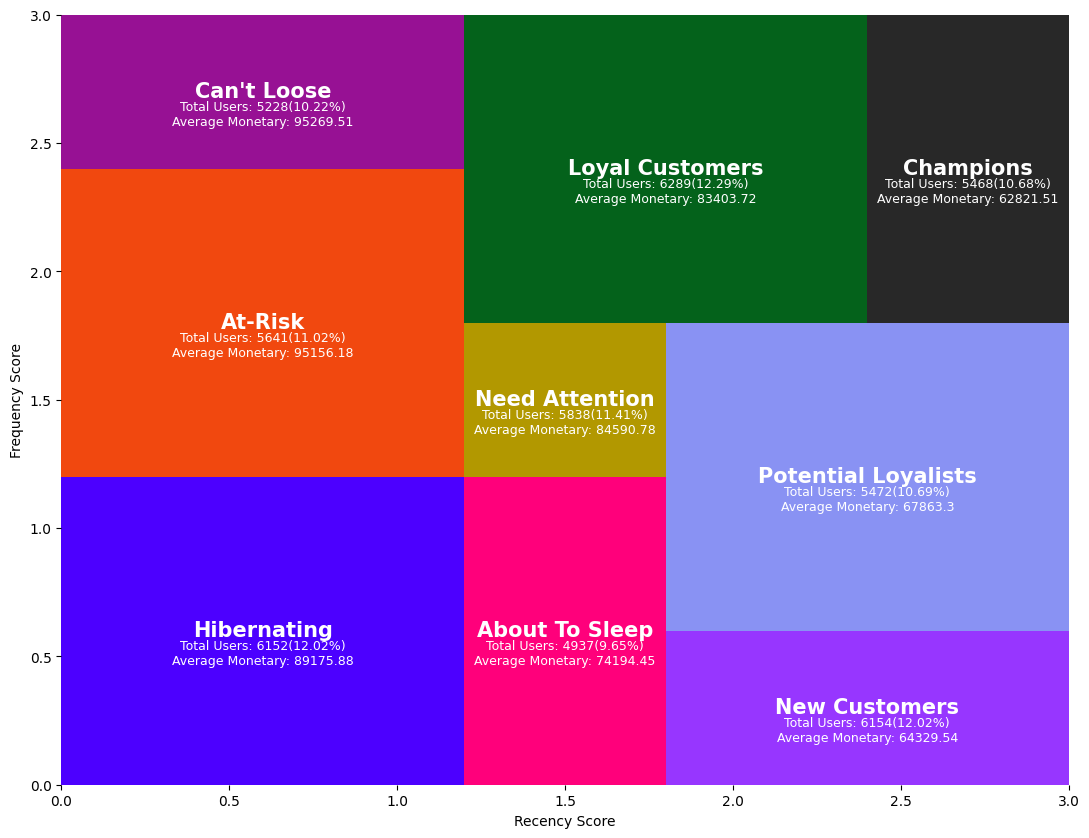

In [127]:
fig, ax = plt.subplots(figsize = (13, 10))

ax.set_xlim([0, 3])
ax.set_ylim([0, 3])

plt.rcParams["axes.facecolor"] = "white"
palette = ["#282828", "#04621B", "#971194", "#F1480F",  "#4C00FF",
           "#FF007B", "#9736FF", "#8992F3", "#B29800", "#80004C"]

for key, color in zip(rfm_coordinates.keys(), palette[:10]):

    coordinates = rfm_coordinates[key]
    ymin, ymax, xmin, xmax = coordinates[0], coordinates[1], coordinates[2], coordinates[3]

    ax.axhspan(ymin = ymin, ymax = ymax, xmin = xmin, xmax = xmax, facecolor = color)

    users = df_rfm[df_rfm.segment == key].shape[0]
    users_percentage = (df_rfm[df_rfm.segment == key].shape[0] / df_rfm.shape[0]) * 100
    avg_monetary = df_rfm[df_rfm.segment == key]["Monetary"].mean()

    user_txt = "\n\nTotal Users: " + str(users) + "(" +  str(round(users_percentage, 2)) + "%)"
    monetary_txt = "\n\n\n\nAverage Monetary: " + str(round(avg_monetary, 2))

    x = 3 * (xmin + xmax) / 2
    y = (ymin + ymax) / 2

    plt.text(x = x, y = y, s = key, ha = "center", va = "center", fontsize = 15, color = "white", fontweight = "bold")
    plt.text(x = x, y = y, s = user_txt, ha = "center", va = "center", fontsize = 9, color = "white")
    plt.text(x = x, y = y, s = monetary_txt, ha = "center", va = "center", fontsize = 9, color = "white")

    ax.set_xlabel("Recency Score")
    ax.set_ylabel("Frequency Score")

sns.despine(left = True, bottom = True)
plt.show()

In [126]:
top10 = df_rfm['segment'].value_counts()[:10]
fig = px.bar(y=top10.values,
             x=top10.index,
             text_auto=True,
             color = top10.index,
             title= 'RFM',
            template= 'ggplot2' )

fig.show()

In [ ]:
import gc
gc.collect()

## K-Means Clustering

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [129]:
df_rfm = pd.read_csv('/content/RFM.csv')

In [130]:
rfm_table = df_rfm.copy()
rfm_clustering = rfm_table.copy()

for col in ["Recency", "Frequency", "Monetary"]:
    # 로그 변환하기 전에 0 또는 음수 값이 있는지 확인
#     if any(rfm_clustering[col] <= 0):
#         # 0이나 음수 값을 피하기 위해 1을 더한 후 로그 변환
#         rfm_clustering[col] = np.log1p(rfm_clustering[col])
#     else:
#         rfm_clustering[col] = np.log(rfm_clustering[col])

    # 스케일링
    scaler = StandardScaler()
    rfm_clustering[col] = scaler.fit_transform(rfm_clustering[col].values.reshape(-1, 1))

rfm_melted = pd.melt(rfm_clustering, value_vars=["Recency", "Frequency", "Monetary"],
                     var_name="RFM", value_name="Value")

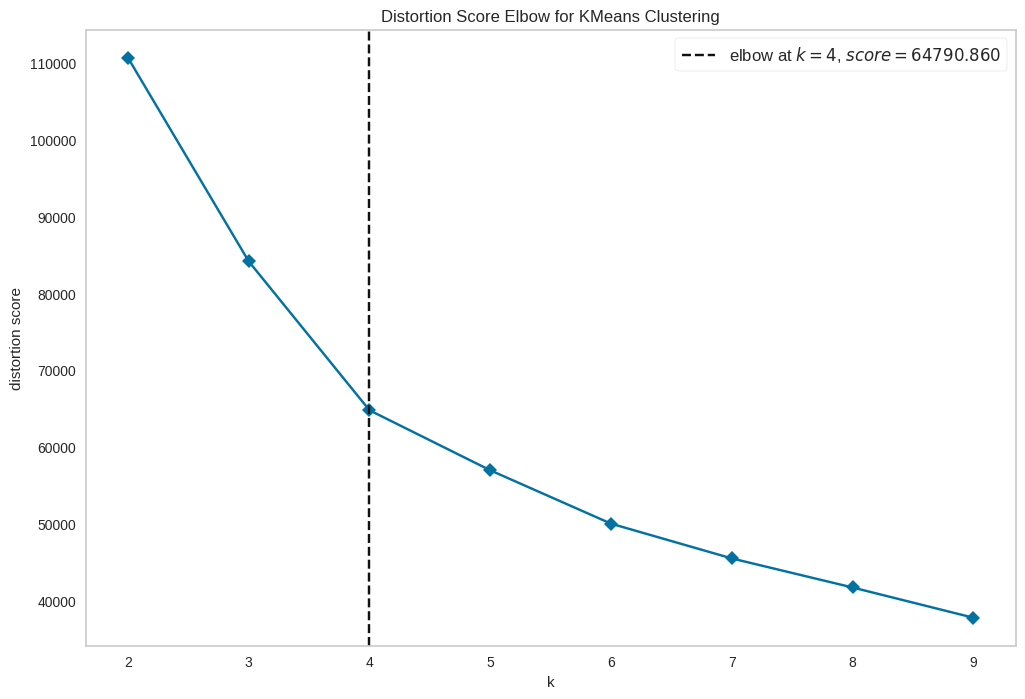

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [132]:
features = ["Recency", "Frequency", "Monetary"]

kmeans_ = KMeans(random_state = 101, init='k-means++', n_init = 10)

fig, ax = plt.subplots(figsize = (12, 8))
ax.grid(False)

visualizer = KElbowVisualizer(kmeans_, k = (2, 10), timings = False)

visualizer.fit(rfm_clustering[features])
visualizer.show()

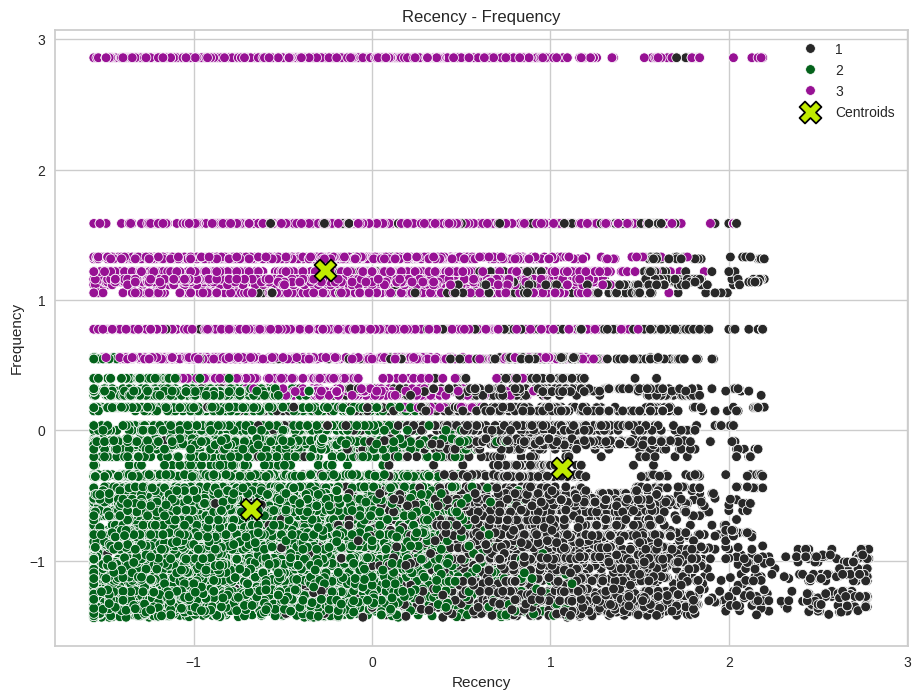

In [133]:
from itertools import combinations

kmeans = KMeans(n_clusters = 3, random_state = 101, init='k-means++', n_init = 10)
kmeans.fit(rfm_clustering[features])
cluster = (kmeans.labels_)+1

fig= plt.subplots(figsize = (11, 8))

palette = ["#282828", "#04621B", "#971194", "#F1480F",  "#4C00FF",
           "#FF007B", "#9736FF", "#8992F3", "#B29800", "#80004C"]

for i, feature in list(enumerate(combinations(["Recency", "Frequency"], 2))):
    # 2개의 요소를 포함하는 모든 조합(combinations) 생성(ex: ('R', 'M'), ('M', 'R')). 순서가 달라도 같은 조합으로 간주. -> enumerate로 인덱스와 함께 열거

    sns.scatterplot(x = rfm_clustering[feature[0]], y = rfm_clustering[feature[1]], hue = cluster,
                    palette = palette[: len(set(cluster))], ).set_title(feature[0] + " - " + feature[1])

    sns.scatterplot(x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1],
                    s = 250, color = '#C0EB00', label = 'Centroids', marker = "X", edgecolor = "black")

plt.show()

- Recency: 낮을 수록 예매주기 빠름
- Frequency: 낮을 수록 예매빈도 적음

In [145]:
df_rfm['cluster'] = cluster

In [146]:
df_rfm.head(3)

key   ID    나이  성별  공연년도  멤버십등급  공연요일  Recency  Frequency  Monetary  \
0   18  121  70.0   0  2020      4     1      357         46     42000   
1   53   35  30.0   1  2019      3     2      164        251     38000   
2  145  197  30.0   0  2022      0     2      294        446     84000   

   Recency_score  Frequency_score  Monetary_score  RF_score  Total_score  \
0              1                1               1        11            3   
1              2                2               1        22            5   
2              1                2               2        12            4   

          segment  cluster  
0     Hibernating        1  
1  Need Attention        2  
2         At-Risk        1

In [147]:
df_rfm.to_csv('/content/rfm_clustering', index = False)

#### RF_predict + cluster merge

In [138]:
df_rf = pd.read_csv('/content/drive/MyDrive/캡스톤_프로젝트/df_result.csv')

In [211]:
result_df = df_rfm.merge(df_rf, on = 'key')
result_df.shape

(51179, 30)

In [215]:
result_df.to_csv('/content/result_df.csv', index=False)

In [214]:
result_df.head()

key   ID    나이  성별  공연년도  멤버십등급  공연요일  Recency  Frequency  Monetary  \
0   18  121  70.0   0  2020      4     1      357         46     42000   
1   53   35  30.0   1  2019      3     2      164        251     38000   
2  145  197  30.0   0  2022      0     2      294        446     84000   
3  285  201  50.0   0  2022      0     1       94        217    130000   
4  293   16  20.0   1  2019      1     2       62        734     40000   

   Recency_score  Frequency_score  Monetary_score  RF_score  Total_score  \
0              1                1               1        11            3   
1              2                2               1        22            5   
2              1                2               2        12            4   
3              3                1               3        31            9   
4              3                3               1        33            7   

          segment  cluster  pred_10000  pred_20000  pred_30000  pred_40000  \
0     Hibernating        1         1.0         1.0         0.0         1.0   
1  Need Attention        2         1.0         1.0         1.0         0.0   
2         At-Risk        1         1.0         1.0         1.0         1.0   
3   New Customers        2         1.0         1.0         1.0         1.0   
4       Champions        3         1.0         1.0         1.0         1.0   

   pred_50000  pred_60000  pred_70000  pred_80000  pred_90000  pred_100000  \
0         1.0         0.0         1.0         0.0         0.0          1.0   
1         1.0         1.0         0.0         0.0         1.0          1.0   
2         1.0         1.0         1.0         1.0         1.0          0.0   
3         1.0         1.0         1.0         0.0         1.0          1.0   
4         1.0         1.0         1.0         1.0         0.0          0.0   

   pred_110000  pred_120000  pred_130000  
0          0.0          0.0          0.0  
1          0.0          0.0          0.0  
2          0.0          0.0          0.0  
3          0.0          0.0          0.0  
4          0.0          0.0          0.0

In [223]:
display(result_df.groupby(['pred_10000'])['ID'].count(), result_df.groupby(['pred_100000'])['ID'].count())

pred_10000
0.0      315
1.0    50864
Name: ID, dtype: int64

pred_100000
0.0    37182
1.0    13997
Name: ID, dtype: int64

- 0: 구매 의사 x
- 1: 구매 의사 o
- 티켓가격이 1만원일때보다 당연히 10만원일때 구매하지 않을 사람이 많을 것이다.

- 구매한 사람들의 클러스터

In [240]:
result_df[result_df['pred_10000'] == 1].groupby('cluster')['pred_10000'].count()

cluster
1    16501
2    20328
3    14035
Name: pred_10000, dtype: int64

# 추가 분석

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('/kaggle/working/rfm_rf.csv')
df.head(3)

key   ID    나이  성별  공연년도  멤버십등급  공연요일   Recency  Frequency  Monetary  \
0   18  121  70.0   0  2020      4     1  1.517090  -1.275730 -0.746958   
1   53   35  30.0   1  2019      3     2 -0.146208  -0.532974 -0.826215   
2  145  197  30.0   0  2022      0     2  0.974148   0.173551  0.085243   

   Recency_score  Frequency_score  Monetary_score  RF_score  Total_score  \
0              1                1               1        11            3   
1              2                2               1        22            5   
2              1                2               2        12            4   

       segment  cluster  prediction_1  prediction_2  prediction_3  \
0         휴면고객        1             1             1             1   
1         잠재고객        2             1             1             0   
2  휴면가능성_type1        1             1             1             1   

   prediction_4  prediction_5  prediction_6  prediction_7  prediction_8  \
0             1             1             1             0             0   
1             0             0             0             0             0   
2             1             1             1             1             1   

   prediction_9  prediction_10  prediction_11  prediction_12  prediction_13  
0             0              0              0              0              0  
1             0              0              0              0              0  
2             1              1              1              1              1

In [ ]:
predictions = [f'prediction_{i}' for i in range(1, 14)]
segment_sum = df.groupby('segment')[predictions].sum()
segment_sum['count'] = df.groupby('segment')['prediction_1'].count()

In [ ]:
df.groupby('segment')['prediction_1'].count()

segment
단골고객           5468
새로운고객          6154
유인필요고객         5228
잠재고객           5838
충성고객_type1     6289
충성고객_type2     5472
휴면가능성_type1    5641
휴면가능성_type2    4937
휴면고객           6152
Name: prediction_1, dtype: int64

In [ ]:
segment_sum

prediction_1  prediction_2  prediction_3  prediction_4  \
segment                                                               
단골고객                 5154          4992          4551          4119   
새로운고객                5802          5599          5145          4682   
유인필요고객               5041          4917          4611          4348   
잠재고객                 5608          5504          5126          4733   
충성고객_type1           6047          5913          5518          5014   
충성고객_type2           5176          5022          4649          4184   
휴면가능성_type1          5439          5309          5007          4730   
휴면가능성_type2          4711          4610          4284          3918   
휴면고객                 5965          5847          5465          5124   

             prediction_5  prediction_6  prediction_7  prediction_8  \
segment                                                               
단골고객                 3516          2887          2491          1913   
새로운고객                3974          3293          2814          2231   
유인필요고객               3732          3153          2726          2324   
잠재고객                 4062          3506          2982          2496   
충성고객_type1           4273          3606          3118          2578   
충성고객_type2           3524          2955          2537          2043   
휴면가능성_type1          4066          3455          3024          2616   
휴면가능성_type2          3356          2796          2396          1950   
휴면고객                 4400          3739          3291          2774   

             prediction_9  prediction_10  prediction_11  prediction_12  \
segment                                                                  
단골고객                 1303           1055            876            587   
새로운고객                1598           1282            986            649   
유인필요고객               1680           1377           1133            858   
잠재고객                 1818           1544           1260            831   
충성고객_type1           1848           1551           1270            881   
충성고객_type2           1395           1131            894            559   
휴면가능성_type1          1903           1544           1291            915   
휴면가능성_type2          1393           1110            897            608   
휴면고객                 2045           1668           1393            940   

             prediction_13  count  
segment                            
단골고객                   534   5468  
새로운고객                  561   6154  
유인필요고객                 785   5228  
잠재고객                   778   5838  
충성고객_type1             790   6289  
충성고객_type2             517   5472  
휴면가능성_type1            833   5641  
휴면가능성_type2            555   4937  
휴면고객                   857   6152

In [ ]:
col = ['1만원', '2만원', '3만원', '4만원', '5만원', '6만원', '7만원', '8만원', '9만원', '10만원', '11만원', '12만원', '13만원']
for i in range(1, 14):
    old_col = f'prediction_{i}'
    new_col = col[i-1]
    segment_sum.rename(columns = {old_col: new_col}, inplace=True)

In [ ]:
segment_sum

1만원     2만원     3만원     4만원     5만원     6만원     7만원     8만원  \
segment                                                                       
단골고객         5154.0  4992.0  4551.0  4119.0  3516.0  2887.0  2491.0  1913.0   
새로운고객        5802.0  5599.0  5145.0  4682.0  3974.0  3293.0  2814.0  2231.0   
유인필요고객       5041.0  4917.0  4611.0  4348.0  3732.0  3153.0  2726.0  2324.0   
잠재고객         5608.0  5504.0  5126.0  4733.0  4062.0  3506.0  2982.0  2496.0   
충성고객_type1   6047.0  5913.0  5518.0  5014.0  4273.0  3606.0  3118.0  2578.0   
충성고객_type2   5176.0  5022.0  4649.0  4184.0  3524.0  2955.0  2537.0  2043.0   
휴면가능성_type1  5439.0  5309.0  5007.0  4730.0  4066.0  3455.0  3024.0  2616.0   
휴면가능성_type2  4711.0  4610.0  4284.0  3918.0  3356.0  2796.0  2396.0  1950.0   
휴면고객         5965.0  5847.0  5465.0  5124.0  4400.0  3739.0  3291.0  2774.0   

                9만원    10만원    11만원   12만원   13만원  count  
segment                                                   
단골고객         1303.0  1055.0   876.0  587.0  534.0   5468  
새로운고객        1598.0  1282.0   986.0  649.0  561.0   6154  
유인필요고객       1680.0  1377.0  1133.0  858.0  785.0   5228  
잠재고객         1818.0  1544.0  1260.0  831.0  778.0   5838  
충성고객_type1   1848.0  1551.0  1270.0  881.0  790.0   6289  
충성고객_type2   1395.0  1131.0   894.0  559.0  517.0   5472  
휴면가능성_type1  1903.0  1544.0  1291.0  915.0  833.0   5641  
휴면가능성_type2  1393.0  1110.0   897.0  608.0  555.0   4937  
휴면고객         2045.0  1668.0  1393.0  940.0  857.0   6152

In [ ]:
for i in col:
    segment_sum[f'비율_{i}'] = segment_sum[f'{i}'] / segment_sum['count']

In [ ]:
segment_rate = segment_sum.drop(columns = col)
segment_rate = segment_rate.reset_index().T
segment_rate = segment_rate.rename(columns = segment_rate.iloc[0])

In [ ]:
segment_rate = segment_rate.drop(segment_rate.index[0:2])
segment_rate.head(3)

단골고객     새로운고객    유인필요고객      잠재고객 충성고객_type1 충성고객_type2  \
비율_1만원  0.942575  0.942801  0.964231  0.960603    0.96152   0.945906   
비율_2만원  0.912948  0.909815  0.940513  0.942789   0.940213   0.917763   
비율_3만원  0.832297  0.836042  0.881982   0.87804   0.877405   0.849598   

       휴면가능성_type1 휴면가능성_type2      휴면고객  
비율_1만원    0.964191    0.954223  0.969603  
비율_2만원    0.941145    0.933765  0.950423  
비율_3만원    0.887609    0.867733  0.888329

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=5, cols=2, subplot_titles=segment_rate.columns)

# 서브플롯에 데이터 추가
for i, col in enumerate(segment_rate.columns):
    row = i // 2 + 1
    col_num = i % 2 + 1

    trace = go.Bar(
        x=segment_rate.index,
        y=segment_rate[col],
        name=col
    )

    fig.add_trace(trace, row=row, col=col_num)

# 레이아웃 및 스타일 설정
fig.update_layout(title_text='Price ratio by segment', title_x=0.5, title_font=dict(size=20), height = 1000, width = 1650)
fig.update_xaxes(title_text='가격구간', row=5, col=1)  # x축 레이블 추가
fig.update_yaxes(title_text='가격비율', row=3, col=1)  # y축 레이블 추가

fig.show()

#### 클러스터별

In [ ]:
df.groupby('segment')[predictions].count()

prediction_1  prediction_2  prediction_3  prediction_4  \
segment                                                               
단골고객                 5468          5468          5468          5468   
새로운고객                6154          6154          6154          6154   
유인필요고객               5228          5228          5228          5228   
잠재고객                 5838          5838          5838          5838   
충성고객_type1           6289          6289          6289          6289   
충성고객_type2           5472          5472          5472          5472   
휴면가능성_type1          5641          5641          5641          5641   
휴면가능성_type2          4937          4937          4937          4937   
휴면고객                 6152          6152          6152          6152   

             prediction_5  prediction_6  prediction_7  prediction_8  \
segment                                                               
단골고객                 5468          5468          5468          5468   
새로운고객                6154          6154          6154          6154   
유인필요고객               5228          5228          5228          5228   
잠재고객                 5838          5838          5838          5838   
충성고객_type1           6289          6289          6289          6289   
충성고객_type2           5472          5472          5472          5472   
휴면가능성_type1          5641          5641          5641          5641   
휴면가능성_type2          4937          4937          4937          4937   
휴면고객                 6152          6152          6152          6152   

             prediction_9  prediction_10  prediction_11  prediction_12  \
segment                                                                  
단골고객                 5468           5468           5468           5468   
새로운고객                6154           6154           6154           6154   
유인필요고객               5228           5228           5228           5228   
잠재고객                 5838           5838           5838           5838   
충성고객_type1           6289           6289           6289           6289   
충성고객_type2           5472           5472           5472           5472   
휴면가능성_type1          5641           5641           5641           5641   
휴면가능성_type2          4937           4937           4937           4937   
휴면고객                 6152           6152           6152           6152   

             prediction_13  
segment                     
단골고객                  5468  
새로운고객                 6154  
유인필요고객                5228  
잠재고객                  5838  
충성고객_type1            6289  
충성고객_type2            5472  
휴면가능성_type1           5641  
휴면가능성_type2           4937  
휴면고객                  6152

In [ ]:
# cluster_sum = df.groupby('cluster')[['prediction_1', 'prediction_2', 'prediction_3', 'prediction_4', 'prediction_5', 'prediction_6', 'prediction_7', 'prediction_8']].sum()
# cluster_sum['size'] = df.groupby('cluster')['ID'].count()
# cluster_sum.rename(columns = {'size': 'raw', 'prediction_1': '7만원', 'prediction_2': '7만5천원', 'prediction_3': '8만원', 'prediction_4': '8만5천원', 'prediction_5': '9만원', 'prediction_6': '9만5천원', 'prediction_7': '10만원', 'prediction_8': '10만2천원'}, inplace = True)

# col = ['raw', '7만원', '7만5천원', '8만원', '8만5천원', '9만원', '9만5천원', '10만원', '10만2천원']
# for i in col:
#     cluster_sum[f'비율_{i}'] = cluster_sum[f'{i}'] / cluster_sum['raw']

# cluster_rate = cluster_sum.drop(columns = col)
# cluster_rate = cluster_rate.reset_index().T
# cluster_rate = cluster_rate.rename(columns = cluster_rate.iloc[0])
# ########

predictions = [f'prediction_{i}' for i in range(1, 14)]
cluster_sum = df.groupby('cluster')[predictions].sum()
cluster_sum['count'] = df.groupby('cluster')['prediction_1'].count()
col = ['1만원', '2만원', '3만원', '4만원', '5만원', '6만원', '7만원', '8만원', '9만원', '10만원', '11만원', '12만원', '13만원']
column_mapping  = {f'prediction_{i}': col[i-1] for i in range(1, 14)}
column_mapping['count'] = 'count'
cluster_sum.rename(columns=column_mapping, inplace=True)
for i in col:
    cluster_sum[f'비율_{i}'] = cluster_sum[f'{i}'] / cluster_sum['count']
cluster_rate = cluster_sum.drop(columns = col, axis=1)
cluster_rate = cluster_rate.T

In [ ]:
cluster_rate

cluster           1.0           2.0          3.0
count    26016.000000  21839.000000  3324.000000
비율_1만원       0.965637      0.942763     0.972323
비율_2만원       0.945879      0.912359     0.956679
비율_3만원       0.891336      0.831906     0.902226
비율_4만원       0.840137      0.739549     0.855596
비율_5만원       0.727898      0.612024     0.782190
비율_6만원       0.624962      0.493887     0.705475
비율_7만원       0.547701      0.411099     0.647413
비율_8만원       0.458487      0.323687     0.580024
비율_9만원       0.323224      0.225331     0.497292
비율_10만원      0.260801      0.182060     0.451564
비율_11만원      0.208141      0.147168     0.412455
비율_12만원      0.135032      0.097898     0.354091
비율_13만원      0.120003      0.089152     0.343261

In [ ]:
cluster_rate = cluster_rate.drop(cluster_rate.index[0:1])

In [ ]:
cluster_rate

cluster       1.0       2.0       3.0
비율_1만원   0.965637  0.942763  0.972323
비율_2만원   0.945879  0.912359  0.956679
비율_3만원   0.891336  0.831906  0.902226
비율_4만원   0.840137  0.739549  0.855596
비율_5만원   0.727898  0.612024  0.782190
비율_6만원   0.624962  0.493887  0.705475
비율_7만원   0.547701  0.411099  0.647413
비율_8만원   0.458487  0.323687  0.580024
비율_9만원   0.323224  0.225331  0.497292
비율_10만원  0.260801  0.182060  0.451564
비율_11만원  0.208141  0.147168  0.412455
비율_12만원  0.135032  0.097898  0.354091
비율_13만원  0.120003  0.089152  0.343261

#### 비율별 수익계산

In [ ]:
cluster_rate.index = range(10000, 10000 + len(cluster_rate) * 10000, 10000)

In [ ]:
cluster_rate

cluster       1.0       2.0       3.0
10000    0.965637  0.942763  0.972323
20000    0.945879  0.912359  0.956679
30000    0.891336  0.831906  0.902226
40000    0.840137  0.739549  0.855596
50000    0.727898  0.612024  0.782190
60000    0.624962  0.493887  0.705475
70000    0.547701  0.411099  0.647413
80000    0.458487  0.323687  0.580024
90000    0.323224  0.225331  0.497292
100000   0.260801  0.182060  0.451564
110000   0.208141  0.147168  0.412455
120000   0.135032  0.097898  0.354091
130000   0.120003  0.089152  0.343261

In [ ]:
cluster_rv = cluster_rate.mul(cluster_rate.index.astype(int), axis=0)
cluster_rv

cluster           1.0           2.0           3.0
10000     9656.365314   9427.629470   9723.225030
20000    18917.589176  18247.172490  19133.574007
30000    26740.083026  24957.186684  27066.787004
40000    33605.473555  29581.940565  34223.826715
50000    36394.910824  30601.218004  39109.506619
60000    37497.693727  29633.224965  42328.519856
70000    38339.099016  28776.958652  45318.892900
80000    36678.966790  25894.958560  46401.925391
90000    29090.175277  20279.774715  44756.317690
100000   26080.104551  18205.961811  45156.438026
110000   22895.525830  16188.470168  45370.036101
120000   16203.874539  11747.790650  42490.974729
130000   15600.399754  11589.816384  44623.947052

#### 클러서터별 비율 그래프

In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=['Cluster 1', 'Cluster 2', 'Cluster 3'])


# 서브플롯에 데이터 추가
for i, col in enumerate(cluster_rate.columns):
    row = i // 2 + 1
    col_num = i % 2 + 1

    trace = go.Bar(
        x=cluster_rate.index,
        y=cluster_rate[col],
        name=col
    )

    fig.add_trace(trace, row=row, col=col_num)

# 레이아웃 및 스타일 설정
fig.update_layout(title_text='Revenue ratio by cluster', title_x=0.5, title_font=dict(size=20), height = 1000, width = 1650)
fig.update_xaxes(title_text='가격구간', row=5, col=1)  # x축 레이블 추가
fig.update_yaxes(title_text='가격비율', row=3, col=1)  # y축 레이블 추가

fig.show()

#### 비율별 수익 그래프

In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=['Cluster 1', 'Cluster 2', 'Cluster 3'])


# 서브플롯에 데이터 추가
for i, col in enumerate(cluster_rv.columns):
    row = i // 2 + 1
    col_num = i % 2 + 1

    trace = go.Bar(
        x=cluster_rv.index,
        y=cluster_rv[col],
        name=col
    )

    fig.add_trace(trace, row=row, col=col_num)

# 레이아웃 및 스타일 설정
fig.update_layout(title_text='Revenue by cluster', title_x=0.5, title_font=dict(size=20), height = 1000, width = 1650)
fig.update_xaxes(title_text='가격구간', row=5, col=1)  # x축 레이블 추가
fig.update_yaxes(title_text='가격비율', row=3, col=1)  # y축 레이블 추가

fig.show()

- 클러스터 1, 4, 5
- 클러스터 2, 6
- 클러스터 3

In [ ]:
# def cluster_map(x):
#     cluster_mapping = {1: 1, 2: 2, 3:3, 4: 1, 5: 1, 6: 2}
#     return cluster_mapping[x]

# df.loc[:, 'cluster'] = df['cluster'].map(cluster_map)

In [ ]:
df['cluster'].nunique()

3

In [ ]:
#각 공연별 groupby 후, cluster별 count/cluster 총 count

In [ ]:
con_code = pd.read_csv('/kaggle/input/caps1/df.csv', index_col = 0)
con_code = con_code[['key', '공연코드']]
df = df.merge(con_code, on='key', how='right')
df.head(3)

key     ID    나이   성별    공연년도  멤버십등급  Recency  Frequency  Monetary  \
0   18  121.0  70.0  0.0  2020.0    4.0  1.51709   -1.27573 -0.746958   
1   28    NaN   NaN  NaN     NaN    NaN      NaN        NaN       NaN   
2   29    NaN   NaN  NaN     NaN    NaN      NaN        NaN       NaN   

   Recency_score  ...  prediction_7  prediction_8  prediction_9  \
0            1.0  ...           0.0           0.0           0.0   
1            NaN  ...           NaN           NaN           NaN   
2            NaN  ...           NaN           NaN           NaN   

   prediction_10 prediction_11  prediction_12  prediction_13  공연코드_x  공연코드_y  \
0            0.0           0.0            0.0            0.0    76.0    76.0   
1            NaN           NaN            NaN            NaN     NaN     NaN   
2            NaN           NaN            NaN            NaN     NaN     NaN   

   공연코드  
0    76  
1   221  
2   221  

[3 rows x 32 columns]

In [ ]:
df.dropna(inplace=True)
df.shape

(51179, 32)

In [ ]:
df.head(3)

key     ID    나이   성별    공연년도  멤버십등급   Recency  Frequency  Monetary  \
0   18  121.0  70.0  0.0  2020.0    4.0  1.517090  -1.275730 -0.746958   
4   53   35.0  30.0  1.0  2019.0    3.0 -0.146208  -0.532974 -0.826215   
8  145  197.0  30.0  0.0  2022.0    0.0  0.974148   0.173551  0.085243   

   Recency_score  ...  prediction_7  prediction_8  prediction_9  \
0            1.0  ...           0.0           0.0           0.0   
4            2.0  ...           0.0           0.0           0.0   
8            1.0  ...           1.0           1.0           1.0   

   prediction_10 prediction_11  prediction_12  prediction_13  공연코드_x  공연코드_y  \
0            0.0           0.0            0.0            0.0    76.0    76.0   
4            0.0           0.0            0.0            0.0  2059.0  2059.0   
8            1.0           1.0            1.0            1.0  1997.0  1997.0   

   공연코드  
0    76  
4  2059  
8  1997  

[3 rows x 32 columns]

In [ ]:
# df.to_csv('/kaggle/working/final_rfm.csv', index=False)

In [ ]:
count_cl = df.groupby(['공연코드_x'], as_index=False)['cluster'].count()

In [ ]:
con_cluster

key  공연코드_x  cluster_x  ID  cluster_y  cluster_rate
0         4174     3.0        2.0   1        453      0.002208
1         4525     3.0        1.0   1        453      0.002208
2        14463     3.0        2.0   1        453      0.002208
3        21203     3.0        2.0   1        453      0.002208
4        30176     3.0        1.0   1        453      0.002208
...        ...     ...        ...  ..        ...           ...
51174  1909969  2936.0        2.0   1        504      0.001984
51175  1913179  2936.0        1.0   1        504      0.001984
51176  1914333  2936.0        2.0   1        504      0.001984
51177  1917789  2936.0        2.0   1        504      0.001984
51178  1918715  2936.0        1.0   1        504      0.001984

[51179 rows x 6 columns]

In [ ]:
con_cluster = df.groupby(['key', '공연코드_x', 'cluster'], as_index=False)['ID'].count()
con_cluster = con_cluster.merge(count_cl, on='공연코드_x', how='right')
con_cluster['cluster_rate'] = con_cluster['ID']/ con_cluster['cluster_y']
con_cluster.groupby('cluster_x', as_index=False)['cluster_rate'].mean()

cluster_x  cluster_rate
0        1.0      0.002035
1        2.0      0.003062
2        3.0      0.001256

In [ ]:
con_cluster.head()

key  공연코드_x  cluster_x  ID  cluster_y  cluster_rate
0   4174     3.0        2.0   1        453      0.002208
1   4525     3.0        1.0   1        453      0.002208
2  14463     3.0        2.0   1        453      0.002208
3  21203     3.0        2.0   1        453      0.002208
4  30176     3.0        1.0   1        453      0.002208

In [ ]:
#cluster별 합/총 cluster 합
count_cl.sum()[1]

51179.0

In [ ]:
con_cluster_rate = con_cluster.groupby(['cluster_x'],as_index=False)['key'].count()

In [ ]:
con_cluster_rate['rate'] = con_cluster_rate['key']/count_cl.sum()[1]
con_cluster_rate.to_csv('/kaggle/working/cluster_rate.csv', index=False)

In [ ]:
con_cluster_rate

cluster_x    key      rate
0        1.0  26016  0.508333
1        2.0  21839  0.426718
2        3.0   3324  0.064949

In [ ]:
# A공연 = 1:30% 2:40%, -----
# 전체공연에대한 mean()  1: % 2%
# ㄴ 좌석까지(좌석도 전체예매 data로)

#### 클러스터별 세그먼트 비율

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
ID_rate = df.groupby(['cluster'])[['ID']].count()
cluster_seg = df.groupby(['cluster', 'segment'], as_index=False)['ID'].count()
cluster_seg = cluster_seg.merge(ID_rate, on='cluster', how='right')
cluster_seg['seg_rate'] = cluster_seg['ID_x']/cluster_seg['ID_y']
cluster_seg.sort_values(['cluster', 'seg_rate'], ascending = True).groupby('cluster').tail(2)

cluster      segment  ID_x   ID_y  seg_rate
6       1.0  휴면가능성_type1  4885  26016  0.187769
8       1.0         휴면고객  5785  26016  0.222363
10      2.0        새로운고객  4243  21839  0.194285
9       2.0         단골고객  4880  21839  0.223453
24      3.0  휴면가능성_type1   744   3324  0.223827
20      3.0       유인필요고객   751   3324  0.225933

#### 클러스터별 나이 비율

In [ ]:
cluster_age = df.groupby(['cluster', '나이'],as_index=False)[['ID']].count()
cluster_age = cluster_age.merge(ID_rate, on='cluster', how='right')
cluster_age['age_rate'] = cluster_age['ID_x'] / cluster_age['ID_y']
cluster_age.head()

cluster    나이  ID_x   ID_y  age_rate
0      1.0  10.0   173  26016  0.006650
1      1.0  20.0  2227  26016  0.085601
2      1.0  30.0  5405  26016  0.207757
3      1.0  40.0  5894  26016  0.226553
4      1.0  50.0  6512  26016  0.250308

In [ ]:
pd.set_option('display.max_row', None)

In [ ]:
cluster_age.sort_values('cluster', ascending = True).groupby('cluster')['나이'].mean()

cluster
1.0    45.0
2.0    45.0
3.0    45.0
Name: 나이, dtype: float64

#### 클러스터별 멤버쉽 비율

In [ ]:
mem_size = df.groupby(['cluster', '멤버십등급'], as_index=False)['ID'].size()
mem_cnt = df.groupby(['cluster'], as_index=False)['ID'].count()
mem_cnt = mem_cnt.merge(mem_size, on='cluster', how='right')
mem_cnt['mem_rate'] = mem_cnt['size']/mem_cnt['ID']
mem_cnt.head()

cluster     ID  멤버십등급  size  mem_rate
0      1.0  26016    0.0  6167  0.237046
1      1.0  26016    1.0  2618  0.100630
2      1.0  26016    2.0  3196  0.122847
3      1.0  26016    3.0  3919  0.150638
4      1.0  26016    4.0  9899  0.380497

In [ ]:
mem_cnt.sort_values(['cluster', 'mem_rate'], ascending=True).groupby('cluster').tail(3)

cluster     ID  멤버십등급  size  mem_rate
3       1.0  26016    3.0  3919  0.150638
0       1.0  26016    0.0  6167  0.237046
4       1.0  26016    4.0  9899  0.380497
7       2.0  21839    1.0  4184  0.191584
6       2.0  21839    0.0  5820  0.266496
10      2.0  21839    4.0  7321  0.335226
15      3.0   3324    3.0   425  0.127858
12      3.0   3324    0.0   610  0.183514
16      3.0   3324    4.0  1671  0.502708

#### 클러스터별 성별 비율

In [ ]:
gen_cnt = df.groupby('cluster',as_index=False)['성별'].count()
df.groupby('cluster',as_index=False)['성별'].count()

cluster     성별
0      1.0  26016
1      2.0  21839
2      3.0   3324

In [ ]:
gen = df.groupby(['cluster', '성별'],as_index=False)['ID'].count()
gen = gen.merge(gen_cnt, on='cluster', how='right')
gen['gen_rate'] = gen['ID']/gen['성별_y']
gen.groupby('cluster').tail(1)

cluster  성별_x     ID   성별_y  gen_rate
1      1.0   1.0  16836  26016  0.647140
3      2.0   1.0  14229  21839  0.651541
5      3.0   1.0   2271   3324  0.683213

#### 클러스터별 평균 RFM

In [ ]:
df.groupby(['cluster'])[['Recency', 'Frequency', 'Monetary']].mean()

Recency  Frequency  Monetary
cluster                               
1.0      0.520672  -0.176485  0.195766
2.0     -0.709352   0.169088 -0.624774
3.0      0.585363   0.270371  2.572623

#### 클러스터별 평균 요일

In [ ]:
dow = df.groupby(['cluster', '공연요일'], as_index=False)['ID'].count()

In [ ]:
dow_cnt = df.groupby(['cluster'], as_index=False)['공연요일'].count()

In [ ]:
dow = dow.merge(dow_cnt, on = 'cluster', how='right')
dow

cluster  공연요일_x    ID  공연요일_y
0         1       1  1940   16574
1         1       2  1899   16574
2         1       3  2353   16574
3         1       4  2000   16574
4         1       5  4159   16574
5         1       6  4223   16574
6         2       1  4667   20526
7         2       2  2411   20526
8         2       3  2396   20526
9         2       4  1715   20526
10        2       5  3568   20526
11        2       6  5769   20526
12        3       1  2604   14079
13        3       2  1882   14079
14        3       3  1474   14079
15        3       4  1209   14079
16        3       5  2987   14079
17        3       6  3923   14079

In [ ]:
dow['rate'] = dow['ID']/dow['공연요일_y']
dow

cluster  공연요일_x    ID  공연요일_y      rate
0         1       1  1940   16574  0.117051
1         1       2  1899   16574  0.114577
2         1       3  2353   16574  0.141969
3         1       4  2000   16574  0.120671
4         1       5  4159   16574  0.250935
5         1       6  4223   16574  0.254797
6         2       1  4667   20526  0.227370
7         2       2  2411   20526  0.117461
8         2       3  2396   20526  0.116730
9         2       4  1715   20526  0.083553
10        2       5  3568   20526  0.173828
11        2       6  5769   20526  0.281058
12        3       1  2604   14079  0.184956
13        3       2  1882   14079  0.133674
14        3       3  1474   14079  0.104695
15        3       4  1209   14079  0.085873
16        3       5  2987   14079  0.212160
17        3       6  3923   14079  0.278642

In [ ]:
dow.sort_values(['cluster', 'rate'], ascending = True).groupby('cluster').tail(3)

cluster  공연요일_x    ID  공연요일_y      rate
2         1       3  2353   16574  0.141969
4         1       5  4159   16574  0.250935
5         1       6  4223   16574  0.254797
10        2       5  3568   20526  0.173828
6         2       1  4667   20526  0.227370
11        2       6  5769   20526  0.281058
12        3       1  2604   14079  0.184956
16        3       5  2987   14079  0.212160
17        3       6  3923   14079  0.278642